1.Using the data provided, please answer the following questions:

a)Are all locales impacted by the loss of data equally?

b)Which 5 path_id have the highest average hits in each locale? How about globally?


2.Note that the column “hits” has missing values. Use this data to build a model that predicts the number of hits per session, depending on the given parameters.

a)What other metrics can your model predict that can be useful?

b)What other columns would you like to have to improve your model?

c)Can your model predict the hits for tomorrow?

1. a)Are all locales impacted by the loss of data equally?

# Problem statement

The completeness and accuracy of data that is to be analyzed is one of major checks required to be undertaken 
during data quality assurance and verification. This ensures that the precision of results is not reduced by 
altered data attributes and incase that is the scenario, steps can be taken to correct it or different methodology with 
assumptions that cater for quality is used.

To ensure this, trivago has identified that the data has been corrupted for a week which leads us to ask whether this 
influenced the completeness, distribution and frequency of data points among locales. This check will be important 
in case the data will be used to conduct various A/B testing. The relevance of this quality check and its impact on 
such an analysis is rather high. For instance, this will enable us to determine whether to impute missing data and how, as 
well as whether to use a parametric or nonparametric hypothesis testing method depending on how those missing data influence
the distribution.


# Reasearch question

A viable and valid solution to the problem will require responding to the question below;

1. Are all locales impacted by the loss of data equally?

To operationalize the question, it is interpreted as the proportion of data loss is homogenuous and equal in each locale.
This requires hypothesis testing to determine whether difference in in the distribution of missing data among the 
various locales is statistically significant. 

Data loss can be defined to be binary categorical with instances of missing data being data loss and where data is present
a second category is define. With this data trnsformation, chi_square test can be employed.


Responding to this question requires hypothesis testing which is formulated as follows;

Null hypothesis (H0): There is no significant difference in data loss among locales

Alternative hypothesis (H1): There is significant difference in data loss among locales



# Research objective

1. To determine whether all locales are equally impacted by data loss



# Data analysis

This data analysis is undertaken using pandas and scipy among others. First, the data is imported and visualization techniques are employed to depict the data loss proportions in each local. The graphs serve as a background to intuitively understand the impact of data loss before any statistical analysis are performed.
The implementation is as follows;



In [ ]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import (ggplot, ggtitle, aes, geom_col, theme_dark, 
                      theme_light, scale_x_discrete,
                      position_dodge, geom_text, element_text, theme,
                      geom_histogram, geom_bar, xlab, ylab, scale_y_log10, scale_x_log10,
                      geom_point, geom_smooth, geom_boxplot, coord_flip
                    )
import scipy.stats as stats
import pingouin as pg
import numpy as np
import ast
from bioinfokit.analys import stat as infostat
import seaborn as sns

import numpy as np
from scipy.stats import iqr
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (train_test_split, 
                                     RandomizedSearchCV,
                                     cross_validate
                                     )
from argparse import Namespace
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  HistGradientBoostingRegressor, BaggingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv('DataScientistCaseStudy.csv')


In [ ]:
df

,index,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_duration,hits
0,0,L1,Friday,5,10,2116,[0],3,142.0,27.0
1,1,L2,Friday,17,14,2113,[0],4,11.0,22.0
2,2,L5,Tuesday,11,1,2113,[0],4,24.0,29.0
3,3,L4,Thursday,11,1,2113,[0],2,200.0,105.0
4,4,L2,Tuesday,8,1,2115,"[0,16214]",2,1580.0,327.0
...,...,...,...,...,...,...,...,...,...,...
581484,581484,L1,Wednesday,10,15,2702,[0],2,10.0,NaN
581485,581485,L1,Monday,10,15,2702,"[0,46061,46077]",2,1121.0,NaN
581486,581486,L5,Monday,10,15,2702,[0],2,10346.0,NaN
581487,581487,L5,Saturday,15,15,2702,"[0,76325,76340]",2,2542.0,NaN


In [ ]:
df['data_loss_status'] = np.where(df['hits'].isnull(), 'lost_data', 'not_lost_data')

In [ ]:
df

,index,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_duration,hits,data_loss_status
0,0,L1,Friday,5,10,2116,[0],3,142.0,27.0,not_lost_data
1,1,L2,Friday,17,14,2113,[0],4,11.0,22.0,not_lost_data
2,2,L5,Tuesday,11,1,2113,[0],4,24.0,29.0,not_lost_data
3,3,L4,Thursday,11,1,2113,[0],2,200.0,105.0,not_lost_data
4,4,L2,Tuesday,8,1,2115,"[0,16214]",2,1580.0,327.0,not_lost_data
...,...,...,...,...,...,...,...,...,...,...,...
581484,581484,L1,Wednesday,10,15,2702,[0],2,10.0,NaN,lost_data
581485,581485,L1,Monday,10,15,2702,"[0,46061,46077]",2,1121.0,NaN,lost_data
581486,581486,L5,Monday,10,15,2702,[0],2,10346.0,NaN,lost_data
581487,581487,L5,Saturday,15,15,2702,"[0,76325,76340]",2,2542.0,NaN,lost_data


In [ ]:
# Compute the proportion of data loss in each locale

data_lost_per_locale = (df.groupby(by=['locale', 'data_loss_status'])
                                    ['data_loss_status'].count()
                                    .to_frame()
                                    .rename(columns={'data_loss_status': 'total_count'})
                                    .reset_index()
                        )

data_lost_per_locale

,locale,data_loss_status,total_count
0,L1,lost_data,5882
1,L1,not_lost_data,12017
2,L2,lost_data,42228
3,L2,not_lost_data,83900
4,L3,lost_data,59721
5,L3,not_lost_data,119952
6,L4,lost_data,21041
7,L4,not_lost_data,42051
8,L5,lost_data,27705
9,L5,not_lost_data,55194


From the above computation the proportion of data lost compared to not lost is computed for each locale.

The result of number of missing hits data per locale shows that L3 has the highest
missing data (59,721) while L1 has the lowest missing data (5,882). The mere fact that the same 
number of missing data is not recorded for each locale does not necessarily mean that number of 
missing data is not equal in statistical terms. For the differences in the number of missing data 
in each locale, the question that arises is whether such difference is statistically significant 
to argue that all local are not impacted equally by loss of data. To answer this question,
the formulated hypothesis is tested. Before that, the data loss per locale is visualized as follows.

The visualization of the result is done using barplot and implemented below.



In [ ]:
def plot_bargraph(data: pd.DataFrame, x_colname: str, 
                  y_colname: str, title: str, 
                  fill_colname:str = None
                  ):
    bargraph = (ggplot(data, aes(x=x_colname, y=y_colname, fill=fill_colname))
                    + geom_col(stat='identity', position='dodge') 
                    + theme_dark() 
                    + ggtitle(title)
                )
    return bargraph
                

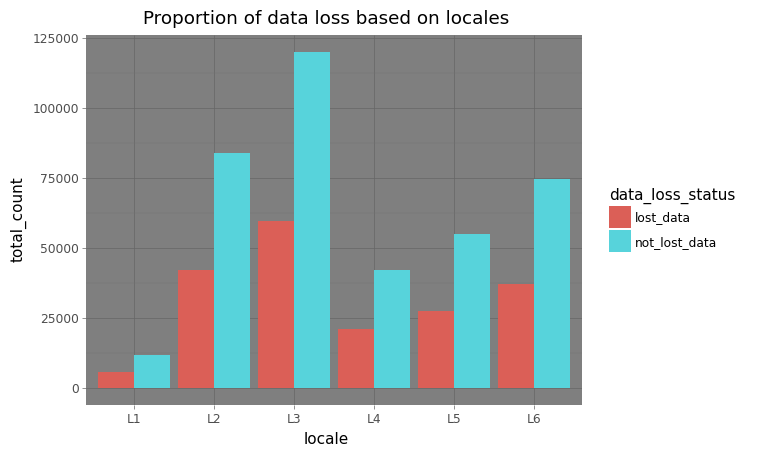

<ggplot: (8727627560177)>

In [ ]:
# implement function to plot data loss
plot_bargraph(data=data_lost_per_locale, x_colname='locale', 
              y_colname='total_count', 
              fill_colname='data_loss_status',
              title='Proportion of data loss based on locales'
              )

In [ ]:
data_lost_per_locale

,locale,data_loss_status,total_count
0,L1,lost_data,5882
1,L1,not_lost_data,12017
2,L2,lost_data,42228
3,L2,not_lost_data,83900
4,L3,lost_data,59721
5,L3,not_lost_data,119952
6,L4,lost_data,21041
7,L4,not_lost_data,42051
8,L5,lost_data,27705
9,L5,not_lost_data,55194


From the above, it is clear that less data was lost compared to recorded in each of the locales. An appraoch to understanding how the impact of data loss varies in various locales is to calculate the percentage of missing data in each locale. This is implemented as follows.


In [ ]:
data_lost_per_locale.groupby(by='locale')['total_count'].sum()

def compute_missing_percent_per_locale(data: pd.DataFrame, 
                                       locale_name: str,
                                       locale_colname: str,
                                       sum_colname: str,
                                       data_loss_colname: str,
                                       lost_data_value: str
                                       ):
  locale_data = data[data[locale_colname] == locale_name]
  locale_total_sample = locale_data[sum_colname].sum()
  locale_missing = (locale_data[locale_data[data_loss_colname]
                                ==lost_data_value][sum_colname].item()
                    )
  missing_percent = (locale_missing / locale_total_sample) *100
  print(f"Percentage of data in {locale_name} that is missing: {round(missing_percent,2)}%")


## implement function for percentage of missing day per locale
for locale_name in data_lost_per_locale['locale'].unique():
  compute_missing_percent_per_locale(data=data_lost_per_locale,
                                     locale_name=locale_name,
                                     locale_colname='locale',
                                     sum_colname='total_count',
                                     data_loss_colname='data_loss_status',
                                     lost_data_value='lost_data'
                                     )

  


Percentage of data in L1 that is missing: 32.86%
Percentage of data in L2 that is missing: 33.48%
Percentage of data in L3 that is missing: 33.24%
Percentage of data in L4 that is missing: 33.35%
Percentage of data in L5 that is missing: 33.42%
Percentage of data in L6 that is missing: 33.33%


The above analysis shows a clear illustration of percentage of data that is missing
in each locale. It is obvious that each locale has almost the same percentage of 
data lost hence can be deem as equally impacted by data loss of about 33% each.

This provides an illustration that data loss impacted each locale equally but not 
a statistical evidence for an objective assessment. There is the need to undertake 
a statistical hypothesis testing to verify if the differences in percentage as shown 
are significant.

In order to objectively determine if this data loss is homogeneous among locales, chi squared test is employed.
The procedure involves computing a contingency table and using that for the analysis. This is implemented as follows.

In [ ]:
# compute contingency table
data_loss_contigency = pd.crosstab(df['locale'], df['data_loss_status'])

data_loss_contigency

data_loss_status,lost_data,not_lost_data
locale,,
L1,5882,12017
L2,42228,83900
L3,59721,119952
L4,21041,42051
L5,27705,55194
L6,37260,74538


In [ ]:
### chi-square test of independence
chi_square_result =  infostat()

chi_square_result.chisq(df=data_loss_contigency)

print(chi_square_result.summary)



Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            5       4.02734   0.545487
Log-likelihood     5       4.03099   0.544962



### Results for equal impact of data loss on locales

With a p-value of 0.545487 being greater than 0.05 (5% significance level), it is suggested that there is no statistically significant relationship between type of type of locale and data loss. Thus, we fail to reject the null hypothesis which suggest that data loss occur 
in equal proportion hence independent of the platform based on available evidence.

### b)Which 5 path_id have the highest average hits in each locale? How about globally?

The top highest hits in each locale is an analysis that is likely to be frequently required. Putting that into consideration, 
code reusability and maintainability becomes important hence object-oriented programming will be appropriate. By this, the 
algorithm for that is implemented as a class. A class is implemented to accept data for which each certain behaviours are defined
as functions such as calculating the average hits per path_id, getting a specified number of path_id with the highest or lowest 
hits and plotting a graph to visualize them. this is implemented below.


In [ ]:
class AverageHitsCalculator(object):
    def __init__(self, data: pd.DataFrame, level: str = 'local', 
                 pathid_colname: str = 'path_id_set'
                 ):
        self.data = data
        self.level = level
        self.pathid_colname = pathid_colname
        
    def compute_average_hits_per_path_id(self,  locale_colname: str = 'locale',
                                         pathid_colname: str = 'path_id_set',
                                         hits_colname: str = 'hits',
                                         ):
        self._locale_colname = locale_colname
        self.hits_colname = hits_colname
        if self.level == 'local':
            self.avg_hits_per_pathid = (self.data.groupby(by=[self._locale_colname, 
                                                              pathid_colname]
                                                          )[[hits_colname]]
                                                        .mean().
                                                        reset_index()
                                    )
        elif self.level == 'global':
            self.avg_hits_per_pathid = (self.data.groupby(by=pathid_colname)
                                                    [hits_colname]
                                                    .mean()
                                                    .reset_index()
                                   )
            
        return self.avg_hits_per_pathid
            
    
    def get_selected_pathid_with_average_hits(self, hits_data: pd.DataFrame = None, 
                                              number_of_pathid_select: int = 5, 
                                              locale_name: str = None,
                                               order: str = 'highest'
                                               ):
        if hits_data is not None:
            self.avg_hits_per_pathid = hits_data
            
        self.locale_name = locale_name
        self._number_of_pathid_select = number_of_pathid_select
        
        if self.level == 'local':
            locale_avg_hits = (self.avg_hits_per_pathid[self.avg_hits_per_pathid
                                                [self._locale_colname]== self.locale_name
                                            ]
                              )
            if order == 'highest':
                self.selected_pathid_with_avg_hits = (locale_avg_hits
                                                        .sort_values(by=self.hits_colname, 
                                                                    ascending=False
                                                                    )
                                                        .head(self._number_of_pathid_select)
                                
                                                )
                return self.selected_pathid_with_avg_hits
            elif order == 'lowest':
                self.selected_pathid_with_avg_hits = (locale_avg_hits
                                                        .sort_values(by=self.hits_colname, 
                                                                    ascending=True
                                                                    )
                                                    .head(self._number_of_pathid_select)
                                
                                                )
                return self.selected_pathid_with_avg_hits
                
            
        elif self.level == 'global':
            if order == 'highest':
                self.selected_pathid_with_avg_hits = (self.avg_hits_per_pathid
                                                        .sort_values(by=self.hits_colname,
                                                                    ascending=False
                                                                    )
                                                        .head(self._number_of_pathid_select)
                                                    )
                return self.selected_pathid_with_avg_hits
            elif order == 'lowest':
                self.selected_pathid_with_avg_hits = (self.avg_hits_per_pathid
                                                      .sort_values(by=self.hits_colname,
                                                                   ascending=True
                                                                   )
                                                      .head(self._number_of_pathid_select)
                                                    )
                return self.selected_pathid_with_avg_hits
    
    
    def plot_average_hits_per_pathid(self, data_to_plot: pd.DataFrame = None):
        if data_to_plot is not None:
            self.data_to_plot= data_to_plot
        self.data_to_plot = self.selected_pathid_with_avg_hits.copy()
        if self.level == 'local':
            title = (f'Top {self._number_of_pathid_select} Path_id_set with Highest average hits in {self.locale_name}'
                     )
        elif self.level == 'global':
            title = f'Top {self._number_of_pathid_select} Path_id_set with Highest average hits globally'
        
        dodge_text = position_dodge(width=0.9)
        self.graph = (ggplot(data=self.data_to_plot, mapping=aes(x=self.pathid_colname, 
                                                         y=self.hits_colname, 
                                                         fill=self.pathid_colname
                                                         )
                            )
                            + geom_col() + theme_dark() 
                            + ggtitle(title) 
                            + geom_text(aes(label='hits'),                                   
                                        position=dodge_text,
                                        size=8, va='bottom'
                                        )
                            + theme(axis_text_x=element_text(rotation=45, hjust=1))
                    
                    )
        return self.graph
    
    


Because different online users visit different number of locations, the length of path_id_set 
varies per user and the name of some path_id_set is rather long due to many locations vistited.
In order to improve legibility of the visualization and labels, a function is written to shorten the 
names of the path_id_set to 25 characters. Where the path_id_set is less than 25 characters, the full name is shown 
on the graph; where as when it exceeds it, it is shorten to 25 characters and ellipsis added to show that the name was shortened. 
 This is implemented below


In [ ]:
def shorten_pathid(data: pd.DataFrame, 
                   pathid_colname: str = 'path_id_set', 
                   path_id_length: int = 25
                   ):
    for i in range(0, len(data)):
        pathid_len = len(data[pathid_colname].unique()[i])
        if pathid_len <= path_id_length:
            path_id = data[pathid_colname].unique()[i]  
        else:
            path_id = data[pathid_colname].unique()[i][:path_id_length] + '...'
        row_index = data.index[i]
        data[pathid_colname][row_index] = path_id
    return data
  

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


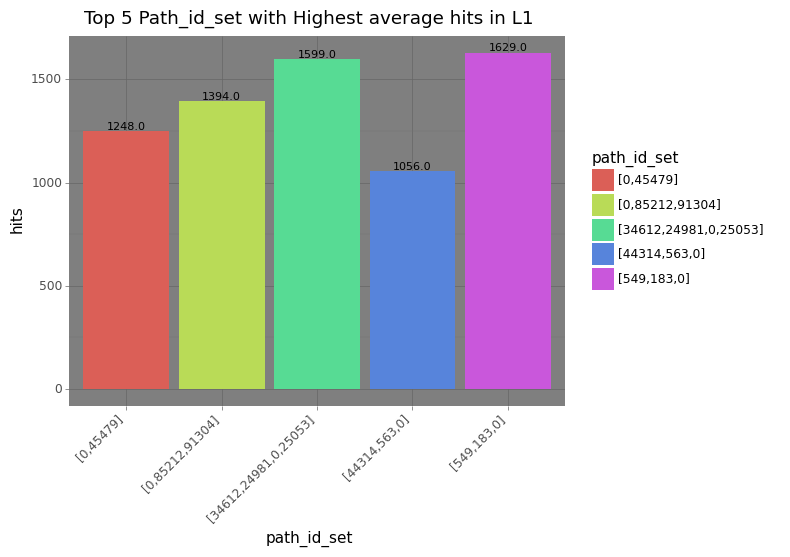

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


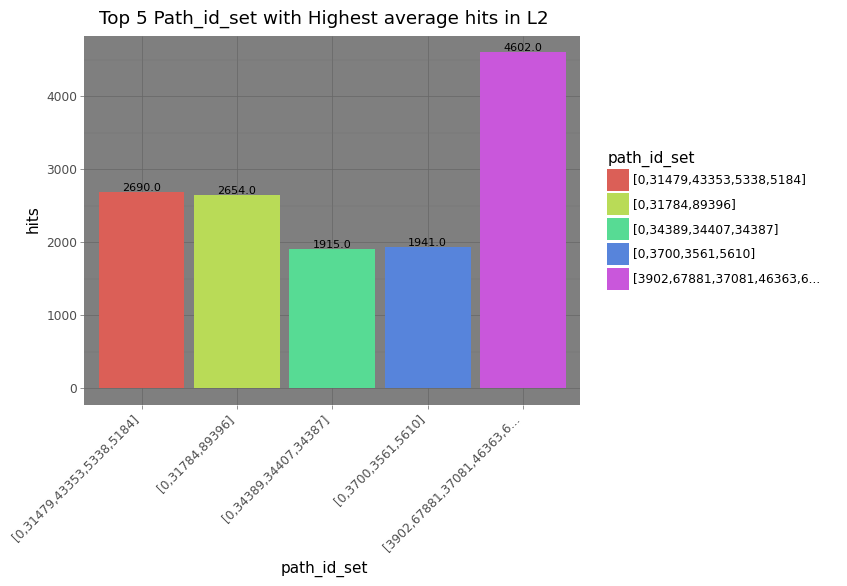

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


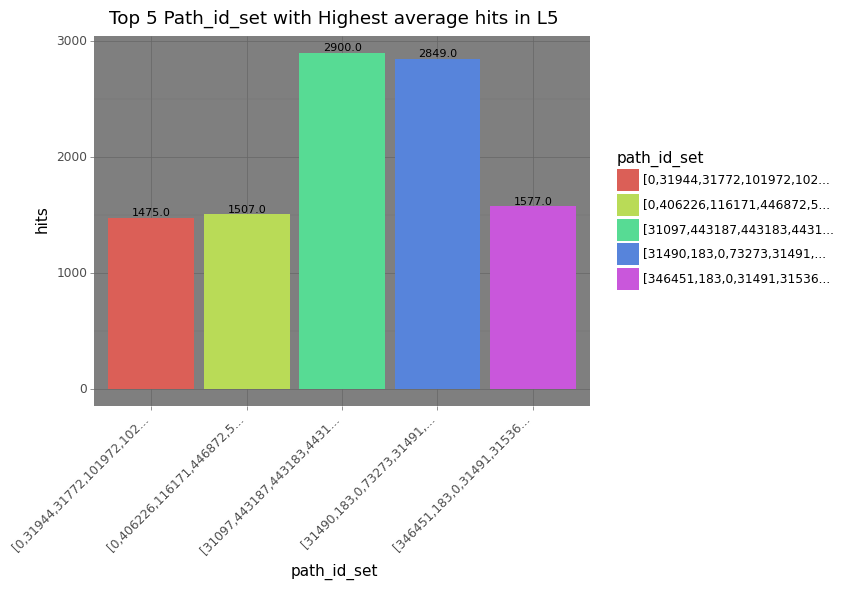

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


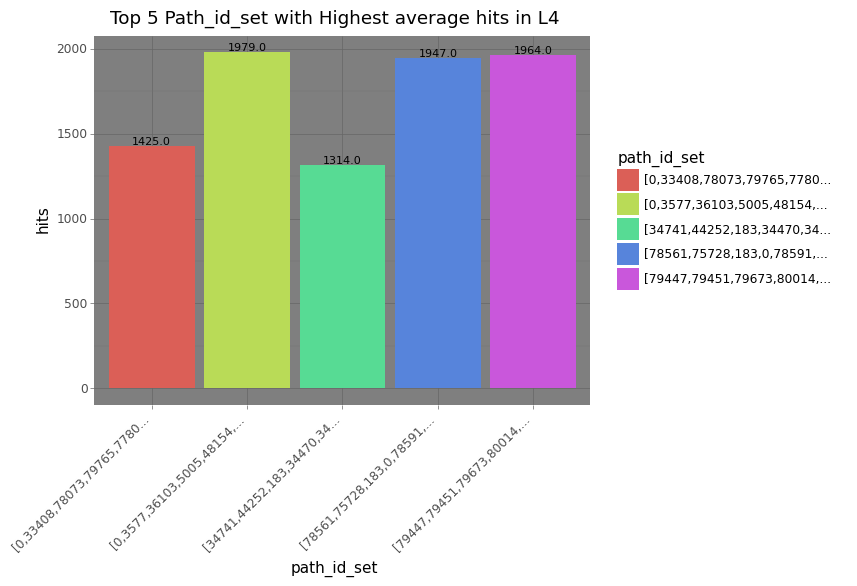

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


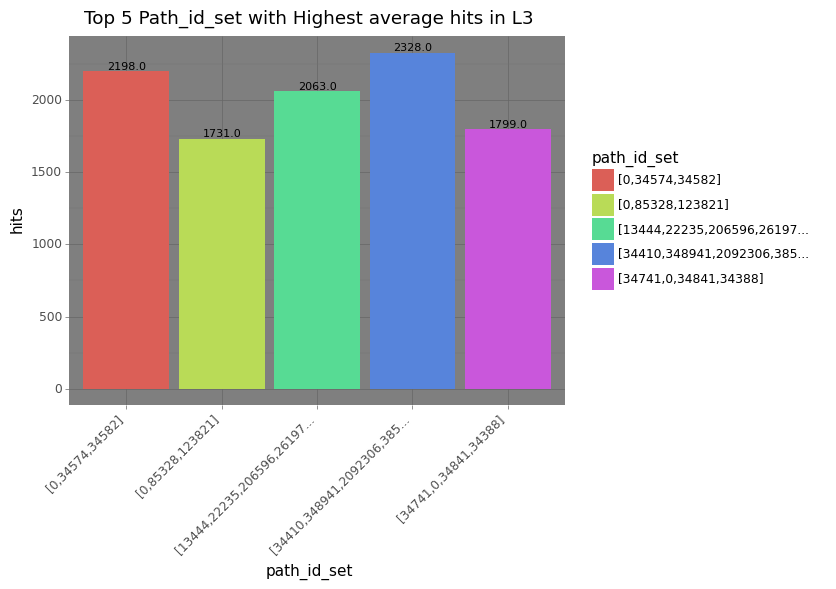

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


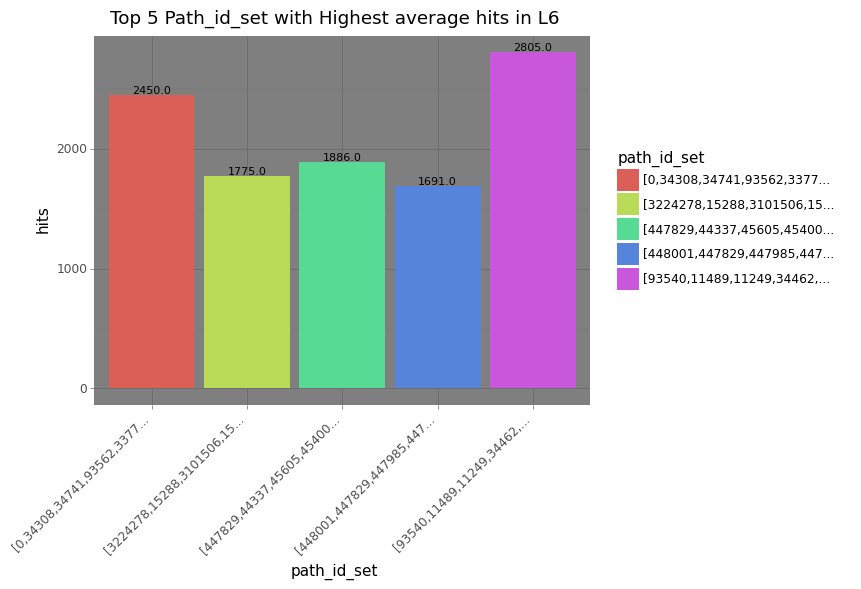

In [ ]:
# Implementation of 5 highest average hit for local and their visualization

for locale_name in df['locale'].unique():
    avg_hits = AverageHitsCalculator(data=df)
    avg_hits_per_pathid = avg_hits.compute_average_hits_per_path_id()
    locale_avg_hits = avg_hits.get_selected_pathid_with_average_hits(locale_name=locale_name)
    locale_pathid_short = shorten_pathid(data=locale_avg_hits, path_id_length=25)
    graph = avg_hits.plot_average_hits_per_pathid(data_to_plot=locale_pathid_short)
    print(graph)

For path_id with 5 highest average hits globally, the same class is implemented but this time round the argument 'global'
is passed to it. The code is as follows:

<ipython-input-18-5a5182004c69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


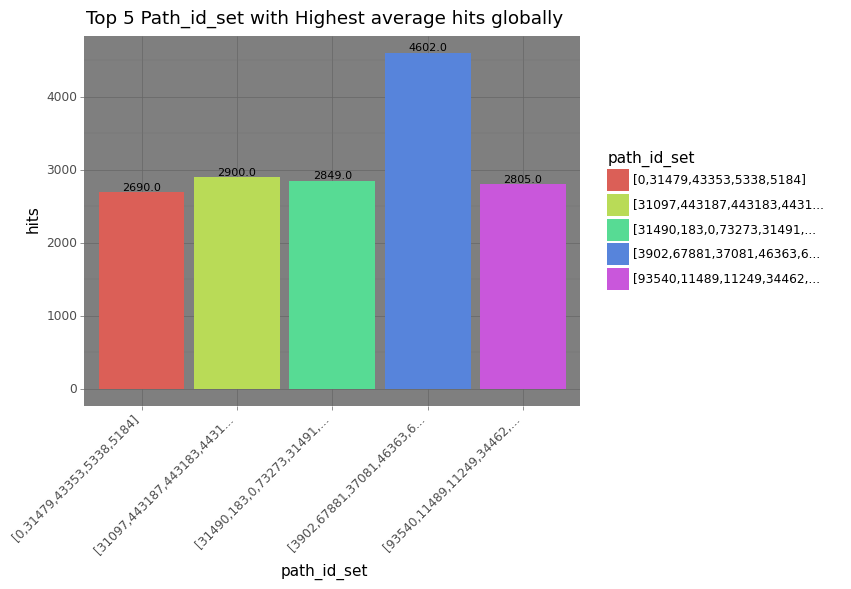

<ggplot: (8727634566364)>

In [ ]:
## implement global top 5 path_id average hits

global_avg_hits = AverageHitsCalculator(data=df, level='global')

global_avg_hits_per_pathid = global_avg_hits.compute_average_hits_per_path_id()

global_highest_avg_hits_5 = global_avg_hits.get_selected_pathid_with_average_hits()
global_pathid_short = shorten_pathid(data=global_highest_avg_hits_5, path_id_length=25)
global_avg_hits.plot_average_hits_per_pathid(data_to_plot=global_pathid_short)



From the above analysis, not only was the top 5 path_id with the highest average hits computed for locale and global but also visualized.

## 2. Use this data to build a model that predicts the number of hits per session, depending on the given parameters.

## Problem statement for hits prediction

As a metasearch engine for accommodation, trivago offers online tech product that requires a clear understanding 
of how and the extent to which users interact with the trivago page. Among others, a key metric to understand this 
user behaviour which has potential for increasing conversion is the number of hits during a session.
Higher hits may signal that users are more engrossed in the product we are providing and spending time to explore  
more of it. This directly feeds into further product development. To move in that direction, there is the need 
to understand how various factors, descriptive of user behaviour, influence and more importantly can 
be leverage to predict hits. Not only is it assummed that features of user behaviour and platform used during a session 
are predictive of hits but also they can be transformed and engineered into more useful predictors. 
The absence of a tool and mechanism that enables trivago to leverage available data to predict hits remains a business 
problem that will be tackled in this task. 


Informed by this, this task aims to predict number of hits during sessions. Thus, the number of hits is the target 
variable and other features of user behaviour, platform and device used are the predictor variables. In order to 
translate this understanding into a technical solution that can be communicated to non-technical 
audience later, there is the need to capture the prevailing challenge as a snapshot with a problem design framework. 


The Situation Complication Question (SCQ) framework is employed for that purpose. 


A key element is identifying the stakeholder and end-user of the solution to be provided. This will require some level of insider information about the various stakeholders who have identified hits prediction as their pain-point. 


Hypothetically, the stakeholder is defined to be the product team with support 
from the data science team. The prodcut team managing the trivago page 
may be interested in knowing the number of 
hits a user will make during a session. This is deduced from the presence of features that are related to the product such as entry page and locations were visited. The advertisement team may be interested in understanding how the source of channel such as search engine marketing influences hits and the 
importance of this hence the inclusion of traffic type as a variable in the dataset.



The SCQ is depicted below;

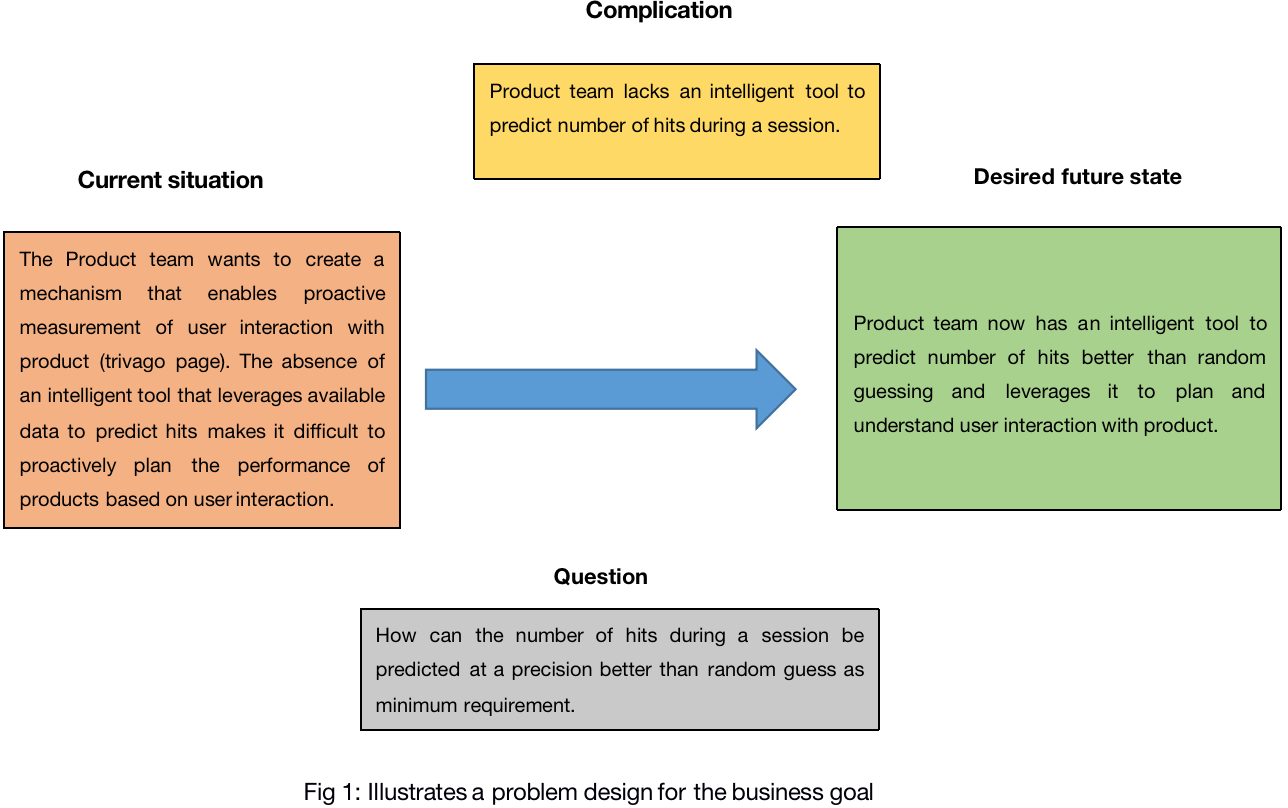

The main focus of a data science task defines its goals, category of algorithm to choose, which objective function to 
optimize, evaluation metric to choose and questions to address hence identified here. 

This task focuses on achieving good accuracy and precision for predicting hits rather than intrepretability of model. This influences how the research question and objective 
is designed.



## Research Question

(I) How do we leverage available data to develop a hit prediction model with an accuracy better than random guessing? 

Worthy of notice is that, not only does this question reflect the focus on model precision but also techniques employed 
within the context of limited resouces such as computational power and time alloted for the task.


## Research objective

(I) To develop a model that predicts hits with an accuracy better than the benchmark baseline model of random guessing


### Expected Results

A machine learning model that predicts number of hits is expected to be discussed in this report.

In developing the machine learning model, the end goal which is prediction accuracy and precision influenced the 
end-product of the modeling process. This assertion informed the methodology and techniques employed. 

With the problem statement and user requirement identified, the whole modeling process 
can be defined to include data exploration and preparation, model development, hyperparameters tuning and evaluation, packaging 
and deployment into production environment. For this task, focus is mainly on detailing data exploration and preparation, modeling and evaluation. Given the time constrain for the exercise, suggestions on improving the results are provided rather than exhaustive implementation of all possible techniques. 



### Identifying variables in the data

In developing an algorithm for prediction, identifying the variables to use and
how to categorize them is important. This determines the type of visualization, statistical test and algorithms to employ.
The following were deduced;

#### Target / Outcome variable

hits: discrete quantitative variable

#### Predictor / feature variables

• locale: Categorical

• day of week: Categorical

• hour of day: Discrete quantitative / can also be cosidered as ordinal

• agent_id: Categorical

• entry page: Categorical 

• path_id_set: Categorical 

• traffic type: Categorical

• Session duration: Discrete quantitative variable



By identifying the type of variable, appropriate visualization can be undertaken for different 
variables during exploratory data analysis. The type of variable also influences the transformation techniques to 
employ hence organized to reflect that.

## Exploratory analysis 

An important aspect of modeling is the data scientist's domain knowledge to complement
the statistical analysis and machine learning algorithms to be applied. This underlined some of the 
logic and decisions in key aspects of the analysis such as feature selection, feature engineering and 
data transformation among others. A highlight of what informed such exploratory analysis is provided as follows.


In selecting features to be included as predictors in the model, the relevance of the feature in terms of 
likelihood of providing actionable insights and predictive signals were considered. 

On this basis, index as a variable was not included in the model because from the metadata, it is more of an identifier for each session but does not provide any information about the session that allows hits made during the session to be predicted.


"Locale" which is the platform used for the session, is likely to have an impact on the number of hits as it is possible that certain platforms are more user friendly and may render trivago web pages better to capture the attention of users more, and engage them longer to probably make more hits. An equally 
important feature that follows this intuition is "agent_id" which is the device used hence also selected to be included in the model. Session duration is likely to be positively related to hits and offer some predictive signals as it is expected that longer session duration will lead to more hits. 


While these assertions offer some guide as to the variables that can be outrightly excluded from the model, the 
selection of many others need to be assess through exploratory analysis. This is undertaken as follows.

###   Descriptive statistics 

Most descriptive statistics such mean, minimum, maximum among others, highlight the range and 
distribution of variables that are quantitative. Hence quantitative variables are selected for this 
type of analysis as follows.








In [ ]:
df[['hour_of_day', 'session_duration', 'hits']].describe()

,hour_of_day,session_duration,hits
count,581489.000000,580614.000000,387652.000000
mean,13.435687,571.172762,65.563253
std,6.366574,2294.111948,78.522627
min,0.000000,0.000000,0.000000
25%,9.000000,16.000000,25.000000
50%,14.000000,70.000000,42.000000
75%,19.000000,285.000000,78.000000
max,23.000000,85889.000000,4602.000000


From the analysis, it is deduced that outliers are likely to be present in session duration and hits.
Session duration has a high difference between the 75% percentile (285) and the maximum (85889). The 
same can be said about hits with 75% percentile being 78 and maximum being 4602. Domain knowledge 
will be used in deciding how outliers are handled.

In [ ]:
# provide info on data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581489 entries, 0 to 581488
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             581489 non-null  int64  
 1   locale            581489 non-null  object 
 2   day_of_week       580638 non-null  object 
 3   hour_of_day       581489 non-null  int64  
 4   agent_id          581489 non-null  int64  
 5   entry_page        581489 non-null  int64  
 6   path_id_set       580614 non-null  object 
 7   traffic_type      581489 non-null  int64  
 8   session_duration  580614 non-null  float64
 9   hits              387652 non-null  float64
 10  data_loss_status  581489 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 48.8+ MB


A key insight gained from this is the presence of missing data for path_id_set, session_duration and hits
hence have to be handle as part of the data preparation process.

While the data type of variables such as agent_id, entry_page, and traffic_type are depicted as integers, they are actualy nominal and categorical variables for that matter. As identified earlier, variables such as agent_id, entry_page, and traffic_type are categorical variables but stored as integers. For these variables, estimating the mean and various percentiles as undertaken will be wrong given that their actual data type does not allow such computations. 
The counts of these variables are already capture.



## Data visualization to ascertain certain assumptions required by some models

Various plots are used to visualize certain characteristics of the data to ascertain if certain assumptions are met for some models to be used. Generally, parametric models like linear regression requires data to be 
normally distributed and a linear relationship to exist between the predictors 
and target variable.


To investigate this, histogram was used to visualize the distribution of data for 
continuous variables. This is implemented below.









In [ ]:
def plot_histogram(data: pd.DataFrame, variable_to_plot: str, 
                   title: str = None, bins_method: str = 'freedman-Diaconis'
                   ):
    data = data.dropna(subset=variable_to_plot).copy()
    
    # by default Freedman–Diaconis rule is computed to determine 
    #optimal number of bins for histogram
    
    if bins_method == 'freedman-Diaconis':
        h = (2 * iqr(np.array(df['hits'].dropna().values))) / (len(df['hits'])
              **(1/3)
            )

        nbins = (df['hits'].max() - df['hits'].min()) / h
        nbins = round(nbins, 1)
    else:
        nbins = 5
        
    if title is None:
        title = f"Distribution of {variable_to_plot}"
    histogram = (ggplot(data, aes(x=variable_to_plot))
                + geom_histogram(bins=nbins)
                + ggtitle(title) 
            )
    return print(histogram)


#### Visualize target variable

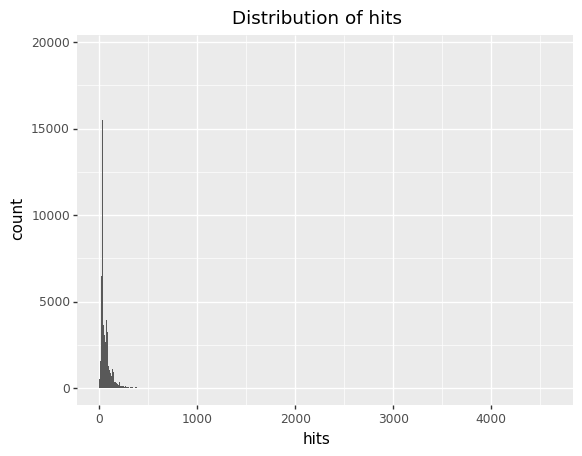

In [ ]:
# Plot of target variable

plot_histogram(data=df, variable_to_plot='hits')

The plot shows that the distribution of hits is right skewed. For large value ranges, 
using logarithmic scale to visualize usually improve the legibility of the graph but in this 
case it also lead to distortion of the actual distribution shape hence not used.


### Visualize quantitative predictor variables

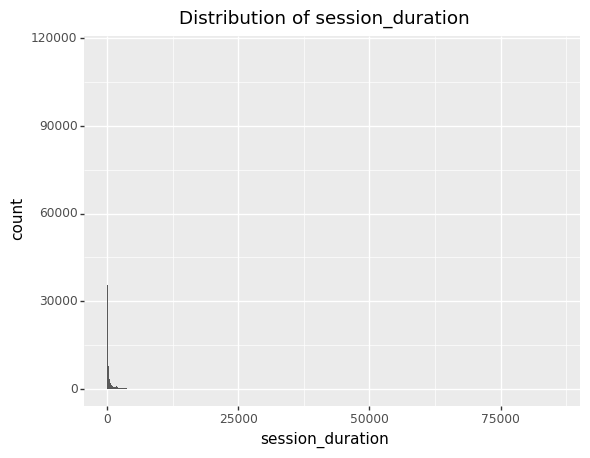

In [ ]:
# plot of quantitative predictor variables

quant_predictor_var = ['hour_of_day', 'session_duration']

plot_histogram(data=df, variable_to_plot='session_duration')

From the histogram, it is clear that session duration is right skewed

Even though hours of the day is can be descrived as quantitative variable, it has limited unique variables hence a bar plot will 
be a better a visualization hence used.

In [ ]:
# barplot 
def barplot(data_to_plot: pd.DataFrame, variable_to_plot: str, title: str,
            ylabel: str, y_colname: str = None):
    if y_colname is None:
        bar_graph = (ggplot(data=data_to_plot, mapping=aes(x=variable_to_plot, 
                                                fill=variable_to_plot
                                            )
                                )
                                + geom_bar() #+ theme_dark() 
                                + ggtitle(title) + xlab(variable_to_plot)
                                + ylab(ylabel)
                        )

        return print(bar_graph)
    else:
        bar_graph = (ggplot(data=data_to_plot, 
                            mapping=aes(x=variable_to_plot, 
                                        y=y_colname,
                                        fill=variable_to_plot
                                        )
                                )
                                + geom_col() #+ theme_dark() 
                                + ggtitle(title) + xlab(variable_to_plot)
                                + ylab(ylabel)
                        )

        return print(bar_graph)


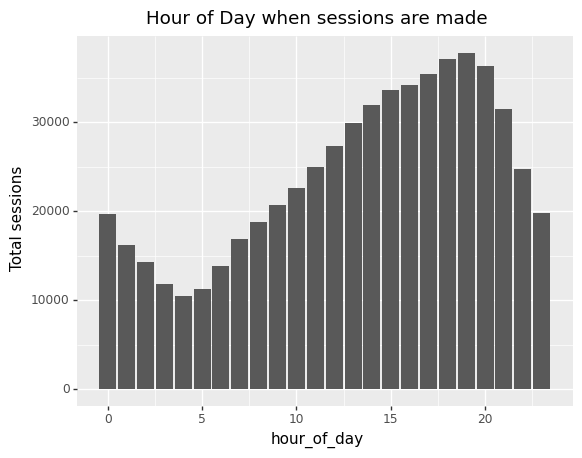

In [ ]:
# Implementation of barplot for hour_of_day  

barplot(data_to_plot=df, variable_to_plot='hour_of_day', 
        title='Hour of Day when sessions are made',
        ylabel='Total sessions'
        )

From the plot of hour of the day, one can argue that the variable is left-skewed with 
more sessions occurring during later hours of the day as number of sessions continue to increase 
from the 5th hour to the 19th hour of the day. This may be related to the users' most active periods.


### Visualizing the relationship between target variable and quantitative predictors

A more important visualization is one that offers insight on the relationship 
between target variable and predictors. In pursuit of investigating whether or not 
a linear relationship between 
target variable and predictor variables exists, a scatterplot is used to visualize 
them. Scatterplot is more appropriate for quantitative variables. 
Thus, all the quantitative predictor variables are plotted against hits as the target variable on 
the y-axis. This is implemented below.












In [ ]:
def plot_scatterplot(data: pd.DataFrame,
                      x_colname: str,
                      y_colname: str = 'hits'
                      ):
    """ Scatterplot to visualize relationship between two variables. 
    Args:
        data (pd.DataFrame): Data which contains variables to plot
        
        y_colname (str): column name (variable) to plot on y-axis
        x_colname (str): column name (variable) to plot on x-axis
    """
    scatter_graph = (ggplot(data=data, mapping=aes(y=y_colname, x=x_colname)) 
                            + geom_point() + geom_smooth(method='lm')
                            + ggtitle(f'Scatter plot to visualize relationship between {y_colname} and {x_colname}')
                    )
    print(scatter_graph)

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 194419 rows containing missing values.


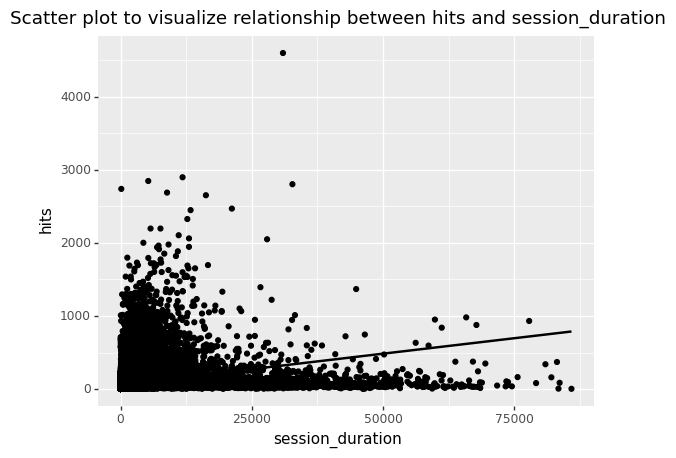

In [ ]:
plot_scatterplot(data=df, x_colname='session_duration')




The scatter plot shows that there is a possible positive relationship between hits and session duration.
The strength of this relationship is not clear but can be determined using statistical methods 
after visualization as part of feature selection procedure.


/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 193837 rows containing missing values.


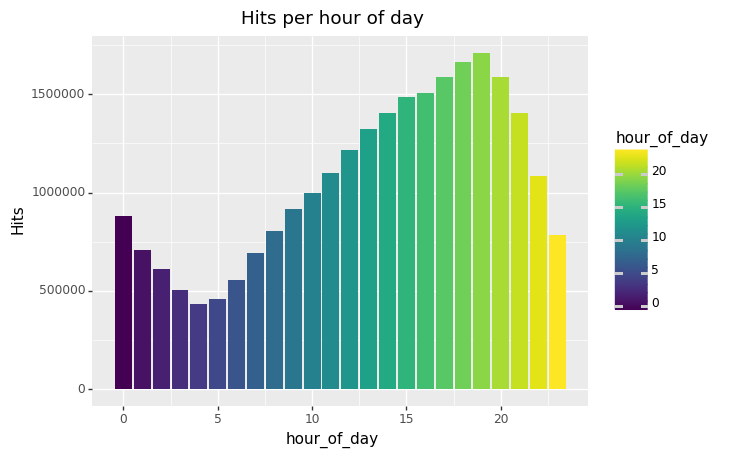

In [ ]:
barplot(data_to_plot=df, variable_to_plot='hour_of_day', 
        title='Hits per hour of day',
        ylabel='Hits', y_colname='hits'
        )

Because hour of day has limited values (0 to 23) using a scatter to visualize it with 
number of hits which has far higher values does not provide the best visuals appear. 
A simple approach to visualizing the underlying trend is to aggregate the data by 
grouping based on hour of day and calculating the sum of hits to visualize how they relate.
This is implemented below;

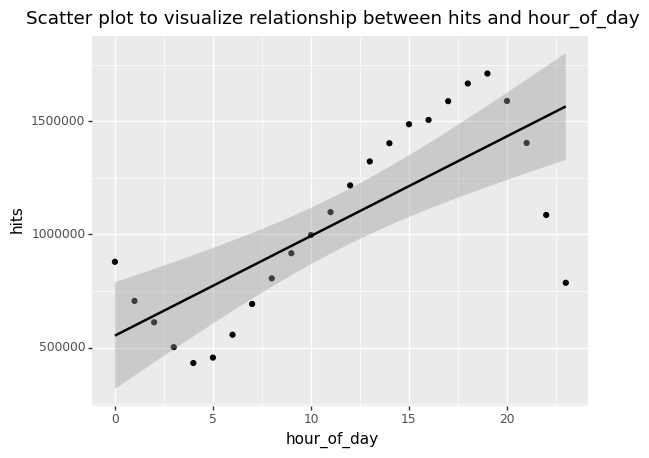

In [ ]:
# scatterplot of total hits and hour of the day.

hits_per_hour_of_day = (df.groupby(by='hour_of_day')['hits']
                        .sum()
                        .reset_index()
                        )

plot_scatterplot(data=hits_per_hour_of_day, x_colname='hour_of_day', 
                 y_colname='hits'
                 )


The above graph is based on the total hits at various hours of the day. With this transformed data, some 
insights are discernible. Noticeable is the changing relation being hits and hour of the day with total 
hits decreasing as hour of the day increases in the early hours of 0 to 4 and then increasing for 5 to 19 
before decreasing thereafter. The insight gained from this can used to create a new feature for prediction of hits.

### Visualization of categorical predictors

Before visualizing the categorical variables, it is worth noting that such visualizations 
are usually more insightful
and appropriate when the categorical variable is of a low cardinality. By this, predictors with
high cardinality are first identified and visualization is done on low cardinal predictors. 
Preprocessing of predictors with High cardinality will be done separately after visualization.
Checking for high cardinality is implemented as follows.




In [ ]:
categorical_vars = ['locale', 'day_of_week', 'agent_id', 'entry_page', 'path_id_set', 'traffic_type']

def get_unique_values(data: pd.DataFrame, variable: str):
    num_values = data[variable].nunique()
    print(f'{variable} has {num_values} unique values')
    
    

for cat_var in categorical_vars:
    get_unique_values(data=df, variable=cat_var)   


 

locale has 6 unique values
day_of_week has 7 unique values
agent_id has 15 unique values
entry_page has 115 unique values
path_id_set has 52345 unique values
traffic_type has 6 unique values


From the analysis, "entry_page" and "path_id_set" have unique values more than 100 hence are considered 
to be of high cardinality. locale, day_of_week and agent_id have 6, 7, and 15 unique values respectively 
and can be considered to be relatively of low cardinality.


In order to visualize the influence of categorical predictor variables on the target variable, 
bar charts were used to depict how total hits is distributed among the various categories.





### Visualizing total hits among locale

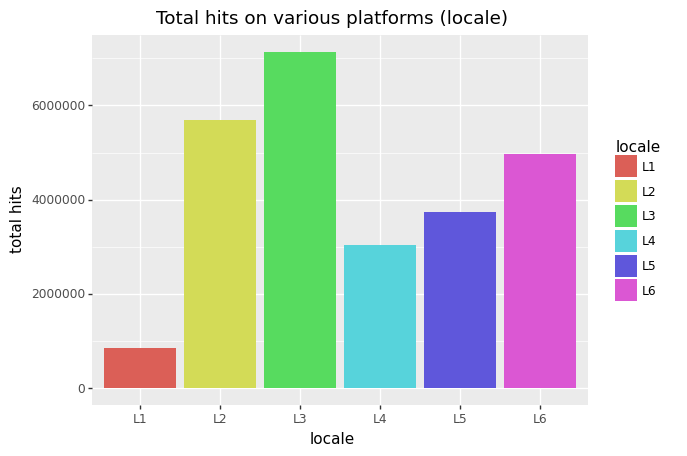

In [ ]:
total_hits_per_locale = df.groupby(by='locale')['hits'].sum().reset_index()

barplot(data_to_plot=total_hits_per_locale, variable_to_plot='locale', 
        y_colname='hits', ylabel='total hits', 
        title='Total hits on various platforms (locale)')

The difference in total hits between various locales is discernible hence it is possible that 
type of locale have an influence on hits. This needs statistical test to verify.

###  Visualizing total hits among day_of_week

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 193837 rows containing missing values.


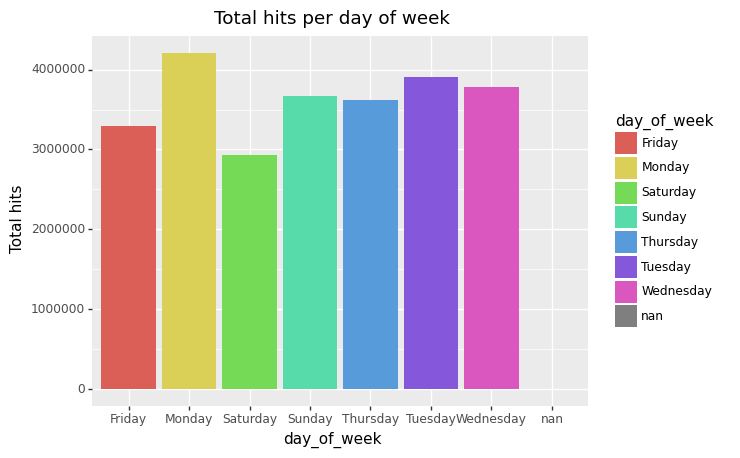

,day_of_week,hits
0,Friday,3288746.0
1,Monday,4207897.0
2,Saturday,2928415.0
3,Sunday,3670625.0
4,Thursday,3624566.0
5,Tuesday,3912110.0
6,Wednesday,3783349.0


In [ ]:

total_hits_per_dayofweek = (df.groupby(by='day_of_week')['hits']
                            .sum().reset_index().dropna()
                            )


barplot(data_to_plot=df, variable_to_plot='day_of_week', y_colname='hits',
        title='Total hits per day of week', ylabel='Total hits')

total_hits_per_dayofweek

From the visualization, there appears to be a difference in total hits between most days of 
the week. This suggests that, day of week may have a significant impact on hits hence 
likely to offer adequate signal for prediction of hits. A statistical test will 
offer a more quantitative and objective measure to determine whether to select this 
feature for inclusion in the model.

####   Visualizing total hits per traffic_type  


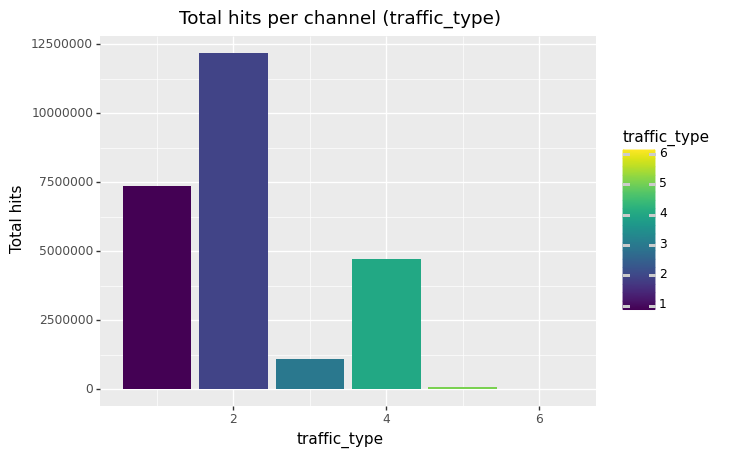

In [ ]:
total_hits_per_traffic_type = (df.groupby(by='traffic_type')['hits']
                               .sum().reset_index()
                              )

total_hits_per_traffic_type

barplot(data_to_plot=total_hits_per_traffic_type, variable_to_plot='traffic_type',
        y_colname='hits', ylabel='Total hits', title='Total hits per channel (traffic_type)'
        )

The bar graph of total hits by channel (traffic type) shows high difference in hits between channels
hence likely to be a relevant feature that impacts hits. To select this feature as an important predictor 
to be included in the model, statistical test will be conducted to verify the graphical interpretation.


### Visualizing total hits per agent_id

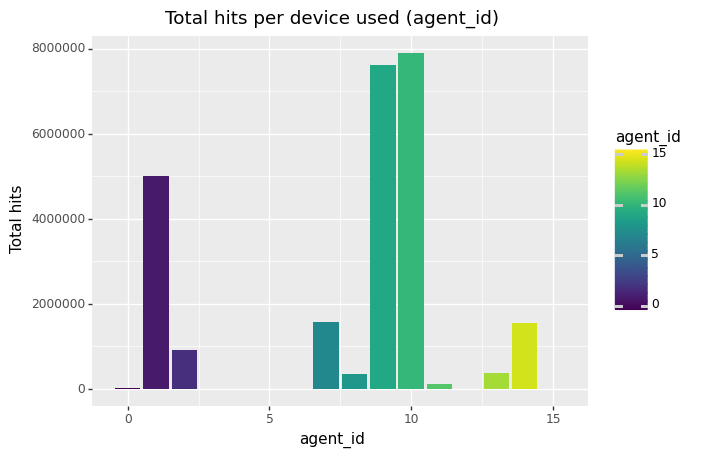

In [ ]:
total_hits_per_agentid = df.groupby(by='agent_id')['hits'].sum().reset_index()

total_hits_per_agentid

barplot(data_to_plot=total_hits_per_agentid, variable_to_plot='agent_id',
        y_colname='hits', ylabel='Total hits', 
        title='Total hits per device used (agent_id)'
        )

From the visualization, agent_id has total hits with less difference between certain devices 
and large difference between other devices. With 15 class, it is argued that this variable 
needs to treated as a high cardinality predictor in the feature transformation process.

## Feature selection

A key element of exploratory analysis is to gain insights that enable selection of only relevant predictors 
that actually contribute to and improve the model. Filter-based selection methods were used for the feature 
selection exercise based on statistical analysis that provides hints on the relationship between predictors 
and the target variable. Feature selection was done before transformation for some variables because feature 
transformation for them will be a more expensive operation. Tranformed features were also 
subjected to the appropriate statistical methods for feature selection. The type of statistical analysis 
used for the feature selection as hinted earlier is determined by the data type of the predictor. 

Thus, feature selection is implemented as follows;




#### Feature selection for categorical features with low cardinality

To select relevant categorical features, hypothesis is tested to determine whether there is a significant 
difference in hits between the classes of a categorical variable. A significant difference suggests that 
the variable is a significant predictor of hits hence have an influence that will improve the model. Univariate 
statistical methods are used to determine that.



#### Feature selection: Is locale a relevant predictor of hits 

A factor that is considered in determining whether a categorical variable such as locale is a relevant 
predictor is the determination of variance of hits between the various categories of locale. By this, when 
hits significantly varies between the various categories of locale, it is likely to be a statistically 
significant predictor of hits. This notions applies to other categorical predictors such as
'agent_id', 'locale', 'day_of_week' and 'traffic_type'. For high cardinality predictors such as 'agent_id',
'entry_page' and 'path_id_set', it better to first 
treat them and reduce the classes to a manageable few before applying relevant statistical test.


In determining which statistical test to use, the assumptions required were tested to determine 
whether a parametric or non-parametric method of statistical test was appropriate. 
A parametric method such as Student t-test requires the data to be normally distributed and variance 
to be homogeneous for the various categories present in the predictor. 
When these assumptions are not captured by the data then a non-parametric method is appropriately used.


Both visualization and statistical methods are used to verify these assumptions. For a categorical 
variable, Boxplot is a good graphical technique to visulaize how hits varies within the various categories.
This is then supplemented with a levene test and bartlett test to statistically verify that variance 
depicted in by boxplot is indeed homogeneous. Barlett and levene method determines whether groups have homogeneous variance and levene is non-parametric method. 


The discussion is implemented in code for all low cardinal variables starting with locale as follows.




In [ ]:
def boxplot(data_to_plot: pd.DataFrame, x_colname: str, 
            y_colname: str,
            title: str = None
            ):
    if title is None:
        title = f'Distribution of {y_colname} among various {x_colname}'
        
    box_graph = (ggplot(data=data_to_plot, 
                        mapping=aes(x=x_colname, y=y_colname)
                        )
                    + geom_boxplot()
                    + coord_flip()
                    + ggtitle(title)
                )
    # the returned ggplot is printed to draw the graph which is not 
    # the case by default  when not printed
    return print(box_graph)
    

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 193837 rows containing non-finite values.


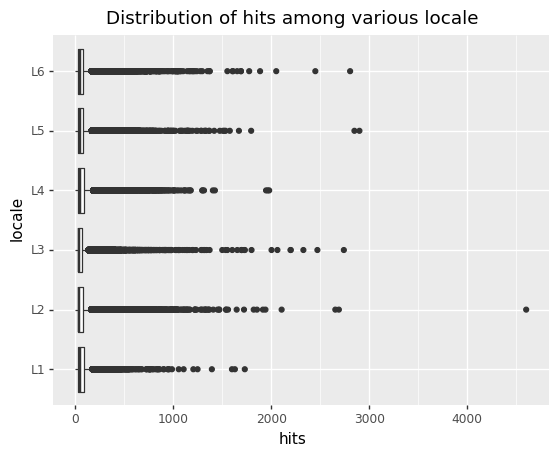

In [ ]:
boxplot(data_to_plot=df, x_colname='locale', y_colname='hits')

From the boxplot of hits distribution among locales, there appears to be difference in how 
hits varies among the various locales and some data points are arguably outliers. 
A statistical test is undertaken to determine if hits in homogenous among the 
varous groups. Such a statistical test is premised on a hypothesis which is framed as 
follows: 


Null Hypothesis (H0): There is no statistically significant difference in variance of hits 
            between categories of a categorical predictor (locale)

Alternative Hypothesis (H1): There is statistically significant difference in variance of hits
            between categories of a categorical predictor (locale)
            
            
For all hypothesis test of homogeneity, this framework is assummed for each categorical predictor.

Both Levene test and Bartlett test are used to check homogeneity and implemented as follows:


In [ ]:
# test of homogeneity of variance
def test_homogeneity(data: pd.DataFrame, target_var: str, predictor_var: str):
    infostat_test = infostat()
    sig_level = f'at 5% significance level'
    infostat_test.bartlett(df=data, res_var=target_var, xfac_var=predictor_var)
    bartlett_summary = infostat_test.bartlett_summary
    bartlett_pval = bartlett_summary[bartlett_summary['Parameter'] == 'p value']['Value'].item()
    
    if bartlett_pval <= 0.05:
        bart_res = 'reject Null hypothesis of equal variance'
    else:
        bart_res = 'fail to reject Null hypothesis of equal variance'
        
    bartlett_interprete = f'With a p-value of {bartlett_pval} the bartlett test suggests to: {bart_res} {sig_level}'
    
    infostat_test.levene(df=data, res_var=target_var, xfac_var=predictor_var)
    levene_summary = infostat_test.levene_summary
    levene_pval = levene_summary[levene_summary['Parameter'] == 'p value']['Value'].item()
    
    if levene_pval <= 0.05:
        levene_res = 'reject Null hypothesis of equal variance'
    else:
        levene_res = 'fail to reject Null hypothesis of equal variance'
        
    levene_interprete = f'With a p-value of {levene_pval}, the Levene test suggests to: {levene_res} {sig_level} '
    
    # results are printed and not return but in case of production environment they will be return
    print(f'Barlett test results of {predictor_var}')
    print(f'{bartlett_summary} \n')
    
    print(f'Levene test results of {predictor_var}')
    print(f'{levene_summary} \n')
    
    print(f'{bartlett_interprete} \n')
    print(f'{levene_interprete} \n')
    
    
    

In [ ]:
## test of homogeneity of variance for locale
test_homogeneity(data=df, target_var='hits', predictor_var='locale')

Barlett test results of locale
                 Parameter      Value
0      Test statistics (T)  3590.5509
1  Degrees of freedom (Df)     5.0000
2                  p value     0.0000 

Levene test results of locale
                 Parameter     Value
0      Test statistics (W)  206.6315
1  Degrees of freedom (Df)    5.0000
2                  p value    0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



Given that the null hypothesis that variance is homogeneous is rejected, 
a non-parametric method such as kruskall wallis is used to 
determine whether there is statistically significant difference in mean hits between various 
locale. Kruskal Wallis test is used to determine if hit is equal among various locales.

Generally, testing such a hypothesis is based on the following framework

Null hypothesis: There is no statistically significant difference in hit between 
     various categories of a categorical predictor (locale)
     
Alternative hypothesis: There is statistical significant difference in the hit 
    between various categories of a categorical predictor (locale)
    
Significant difference between the hitS of locales will suggest that locale 
is capable of discriminating on the number of hits that a user can make during a session 
hence a good predictor of it.  This will lead to its selection. This logic applies to all 
categorical predictors being assessed with this method.

In [ ]:
pg.kruskal(data=df, dv='hits', between='locale')


,Source,ddof1,H,p-unc
Kruskal,locale,5,1512.009324,0.0


The uncorrected p-value of 0.0 suggests to reject the null hypothesis hence hit is 
significantly different for at least one of the categories of locale. This suggest that 
locale is likely to be a good predictor hence is selected for the model building.

### Determine relevance of 'day_of_week' to be selected for modelling  

Visualization for homogeneity of variance of hit for various days of the week 
is achieved using boxplot

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 193837 rows containing non-finite values.


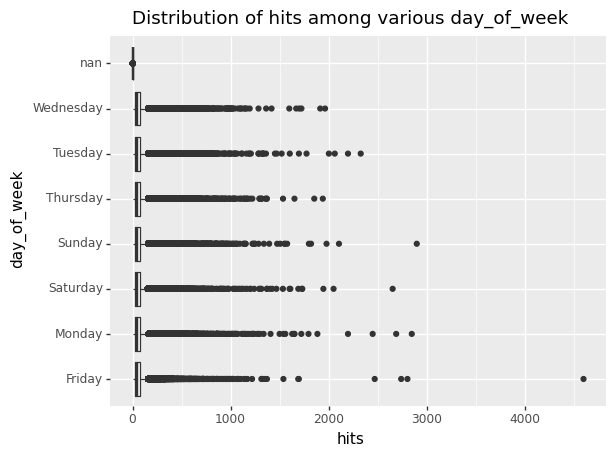

In [ ]:
boxplot(data_to_plot=df, x_colname='day_of_week', y_colname='hits')

In [ ]:
# test for homogeneity of variance in day_of_week

test_homogeneity(data=df, target_var='hits', predictor_var='day_of_week')



Barlett test results of day_of_week
                 Parameter     Value
0      Test statistics (T)  508.2563
1  Degrees of freedom (Df)    6.0000
2                  p value    0.0000 

Levene test results of day_of_week
                 Parameter   Value
0      Test statistics (W)  3.8389
1  Degrees of freedom (Df)  6.0000
2                  p value  0.0008 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0008, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



The test results suggest the assumption of homogeneity of variance should be rejected hence a 
non-parametric method is used to test equal hits among the various days of the week

In [ ]:
# Testing that hits is equal among days of the week
pg.kruskal(data=df, dv='hits', between='day_of_week')


,Source,ddof1,H,p-unc
Kruskal,day_of_week,6,179.460067,4.418415e-36


Given that hits is different among the various days of the week, day of week is likely to be 
a good predictor of hits hence selected to be included in the model.



###  Determine relevance of traffic_type to be selected for modelling

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 193837 rows containing non-finite values.


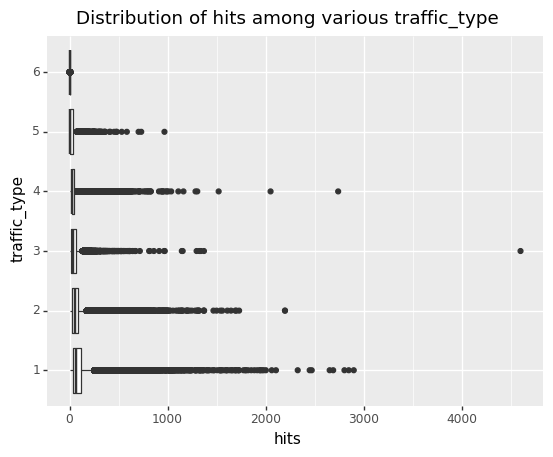

In [ ]:
df_traffic = df.copy()

df_traffic['traffic_type'] = df_traffic['traffic_type'].astype(str)

# visualizing how hits is distributed among various traffic type
boxplot(data_to_plot=df_traffic, 
        x_colname='traffic_type', 
        y_colname='hits'
        )


In [ ]:
test_homogeneity(data=df_traffic, target_var='hits', predictor_var='traffic_type')

pg.kruskal(data=df_traffic, dv='hits', between='traffic_type')


Barlett test results of traffic_type
                 Parameter        Value
0      Test statistics (T)  109517.2369
1  Degrees of freedom (Df)       5.0000
2                  p value       0.0000 

Levene test results of traffic_type
                 Parameter      Value
0      Test statistics (W)  4472.1062
1  Degrees of freedom (Df)     5.0000
2                  p value     0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



,Source,ddof1,H,p-unc
Kruskal,traffic_type,5,46057.652392,0.0


From the kruskal test, the null hypothesis of no difference in hits between various traffic types is
reject which means that traffic type is a relevant predictor for hits.




After using statistical and graphical method for filter-based feature selection of 
low cardinality categorical predictors, high cardinality predictors are transformed into low cardinal predictors.


## Handling predictors with high cardinality

While a number of techniques exists for handling categorical predictors with high cardinality,
the approach adopted for this task was to recategorize less representative values. By this, the number 
of hits and sessions recorded for a category is taken into consideration. The logic is that,
before a platform, channel or device is even considered for predicting hits, we have to make sure that 
users are even using it to interact with trivago page as often as it becomes a dominant medium for 
making hits. 

For the technique used, the expected threshold for equal proportion or share of hits required by each category of a high cardinal predictor is computed. This is computed as
dividing 100% by the cardinality of the predictor (number of unique classes / categories). Thus, 
if all the categories of a predictor achieve this threshold of equal proportion, then there will equal 
hits among them and they are likely to have equal influence hence redundant when the predictor is 
used for modelling. Base on this logic, it becomes intuitive that all categories that do not have more than
this estimated threshold need to be recategorized; which is likely to boost their potential for offering predictive signal in addition to eliminating high cardinality.

This is implemented in code as follows:  

In [ ]:
## This function returns a recategorize predictor which can be used as 
# a lookup to reducing cardinality 
def recategorize_predictor(data: pd.DataFrame, high_cardinality_predictor: str,
                          target_for_regroup: str, 
                           cat_value_to_assign: str = 'other'
                           ):
    total_hits_per_class = (data.groupby(by=high_cardinality_predictor)
                            [target_for_regroup].sum().reset_index()
                            )

    total_hits_per_class['percent_of_total_hits'] = ((total_hits_per_class
                                                      [target_for_regroup]
                                                      / total_hits_per_class
                                                      [target_for_regroup].sum()
                                                      ) * 100
                                                     )
    equal_prop_threshold = (100 / total_hits_per_class[high_cardinality_predictor]
                            .nunique()
                            )
    total_hits_per_class[f'{high_cardinality_predictor}_new_cat'] = (np.where(total_hits_per_class['percent_of_total_hits']
                                                                             <=equal_prop_threshold, cat_value_to_assign, 
                                                                             total_hits_per_class[high_cardinality_predictor]
                                                                             )
                                                                    )
    return total_hits_per_class


In [ ]:
# reduces cardinality using a lookup data that indicates which 
# categories to aggregate into a single one
def reduce_high_cardinality(data: pd.DataFrame, high_cardinality_predictor: str,
                            recategorize_loookup_data: pd.DataFrame, 
                            recategorized_colname_in_lookup: str,
                            cat_value_to_assign: str = 'other',
                            recategorized_value_in_lookup: str = 'other'
                            
                            ):
    cardinality_values_reclassed = (recategorize_loookup_data[recategorize_loookup_data[
                                                                recategorized_colname_in_lookup
                                                                ] 
                                                == recategorized_value_in_lookup]
                                                    [high_cardinality_predictor]
                                                    .values.tolist()
                                    )
    data[f'{high_cardinality_predictor}_new_cat'] = (np.where(data[high_cardinality_predictor]
                                                              .isin(cardinality_values_reclassed), 
                                                            cat_value_to_assign, 
                                                        data[high_cardinality_predictor]
                                                        )
                                                     )
    return data


In [ ]:
## Implementation of technique to reduce cardinality

agent_id_recat = recategorize_predictor(data=df, 
                                        high_cardinality_predictor='agent_id',
                                        target_for_regroup='hits', 
                                        cat_value_to_assign='other'
                                        )

entry_page_recat = recategorize_predictor(data=df, 
                                          high_cardinality_predictor='entry_page',
                                          target_for_regroup='hits'
                                          )


df_recat = df.copy()

# reduce cardinality of agent_id
df_recat = reduce_high_cardinality(data=df_recat, 
                                   recategorize_loookup_data=agent_id_recat,
                                    high_cardinality_predictor='agent_id',
                                    recategorized_colname_in_lookup='agent_id_new_cat',
                                    cat_value_to_assign='other',
                                    recategorized_value_in_lookup='other'
                                    )


# reduce cardinality of entry_page
df_recat = reduce_high_cardinality(data=df_recat, 
                                   recategorize_loookup_data=entry_page_recat,
                                    high_cardinality_predictor='entry_page',
                                    recategorized_colname_in_lookup='entry_page_new_cat',
                                    cat_value_to_assign='other',
                                    recategorized_value_in_lookup='other'
                                )









After implementing the algorithm for reducing cardinality, cardinality is checked on new created variable to 
check its impact as follows:







In [ ]:
recategorize_var = ['agent_id_new_cat', 'entry_page_new_cat']

for recat_var in recategorize_var:
    get_unique_values(data=df_recat, variable=recat_var)

agent_id_new_cat has 4 unique values
entry_page_new_cat has 8 unique values


The technique used reduce cardinality of entry_page from 115 to 8 and that of agent_id from 15 to 4.








###  Determine relevance of recategorized categorical predictors for hits prediction 
### Visualize distribution of hits among recategorized agent_id





/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 193837 rows containing non-finite values.


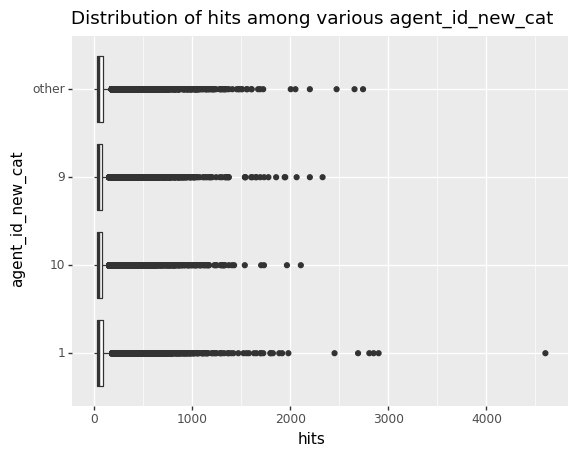

In [ ]:
boxplot(data_to_plot=df_recat, x_colname='agent_id_new_cat', y_colname='hits')


In [ ]:
## test for homogeneity of hit variance for recategorized agent_id
test_homogeneity(data=df_recat, target_var='hits', 
                 predictor_var='agent_id_new_cat'
                 )

Barlett test results of agent_id_new_cat
                 Parameter       Value
0      Test statistics (T)  23581.1215
1  Degrees of freedom (Df)      3.0000
2                  p value      0.0000 

Levene test results of agent_id_new_cat
                 Parameter     Value
0      Test statistics (W)  801.1722
1  Degrees of freedom (Df)    3.0000
2                  p value    0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



The result indicate to reject the null hypothesis of homogeneity of variance and 
non-parametric method is used to determine the relevance of recategorized agent_id

In [ ]:
#%% agent_id_new_cat
pg.kruskal(data=df_recat, dv='hits', between='agent_id_new_cat')

# The result shows that the recategorized agent_id will be a relevant predictor for hits


,Source,ddof1,H,p-unc
Kruskal,agent_id_new_cat,3,1543.905323,0.0


### Determine the relevance of recategorized entry_page for modelling

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 193837 rows containing non-finite values.


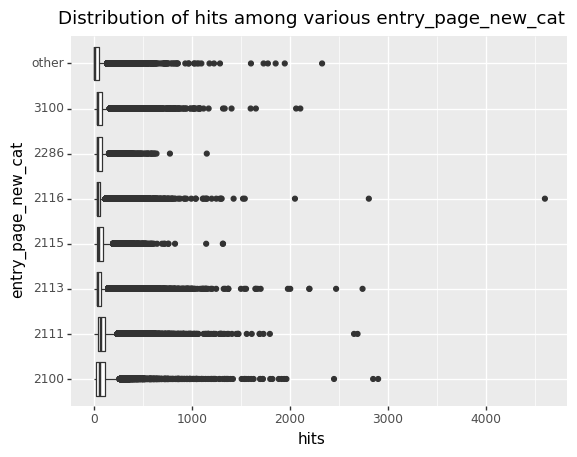

In [ ]:
boxplot(data_to_plot=df_recat, x_colname='entry_page_new_cat', y_colname='hits')

In [ ]:
# test of homogeneity of variance of hit among categories 
# of recategorized entry_page
test_homogeneity(data=df_recat, target_var='hits', 
                 predictor_var='entry_page_new_cat'
                 )

# the result suggest the use of non-parametric method for further analysis given that
# homogeneity of variance was reject.

Barlett test results of entry_page_new_cat
                 Parameter      Value
0      Test statistics (T)  54067.735
1  Degrees of freedom (Df)      7.000
2                  p value      0.000 

Levene test results of entry_page_new_cat
                 Parameter      Value
0      Test statistics (W)  1580.1199
1  Degrees of freedom (Df)     7.0000
2                  p value     0.0000 

With a p-value of 0.0 the bartlett test suggests to: reject Null hypothesis of equal variance at 5% significance level 

With a p-value of 0.0, the Levene test suggests to: reject Null hypothesis of equal variance at 5% significance level  



In [ ]:
pg.kruskal(data=df_recat, dv='hits', between='entry_page_new_cat')
   


,Source,ddof1,H,p-unc
Kruskal,entry_page_new_cat,7,19872.443465,0.0


The analysis shows that hits was significantly different among the various classes of recategorized 
entry_page hence chosen as a predictor for modelling.


The feature path_id_set has a very high cardinality such that even after applying 
the techniques used here, it will still be of high cardinality.
Hence it be will subjected to separate feature engineering likely to produce 
a better transformed predictor.

## Categorical Feature engineering

Adopting data centric approach to modelling requires strategies to develop new features that are relevant
for the modelling task and this was attended to. 

The path_id_set predictor offers valuable information that can be extracted for prediction of hits.
Applying domain knowledge in online advertisment products, page hits usually increase with increase in 
number of pages that a user visits during a session. In this case, as users visit more locations,
 one can expects hits to increase hence the number of locations visited is likely to be 
a good predictor. 

Thus, number of locations visited during a session is an additional indicator created by extracting 
insights from path_id_set. Given that each location visited was identified with an ID in path_id_set,
it was determine that counting the number of IDs in the path_id_set for each session is representative
of the number of locations visited durng a session.

The algorithm for creating number of locations visited as a predictor is implemented as follows:













In [ ]:
def compute_number_of_locations_visited(data: pd.DataFrame, 
                                        pathid_colname: str = 'path_id_set'
                                        ):
    data['num_locations_visited'] = np.nan

    for index, row in data.iterrows():
        pathid = row['path_id_set']
        
        # count number of path_id only where is not NaN because 
        # missing values need to be imputed
        if pathid is not np.nan:
            path_list = ast.literal_eval(pathid)
            data['num_locations_visited'][index] = len(path_list)
        
    return data

In [ ]:
#  implementation of computing number of locations visited predictor 

df_recat = compute_number_of_locations_visited(data=df_recat)

## show path_id_set and feature engineered from it
df_recat[['path_id_set', 'num_locations_visited']].head()


<ipython-input-56-18fa0d61e748>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,path_id_set,num_locations_visited
0,[0],1.0
1,[0],1.0
2,[0],1.0
3,[0],1.0
4,"[0,16214]",2.0


## Numeric feature selection


Techniques employed for numeric feature selection are different from that of categorical features.
Among others, multicollinearity is checked to prevent including redundant predictors.
Certain algorithms assume that the predictors are not strongly correlated to each other. Strong correlation between predictors
implies the predictors are supplying similar information to the algorithm which could lead to overfitting hence dimension reduction technique are required to reduce or select only variables that enable the algorithm to gain new insights from the data and improve predictive power.

Correlation analysis is undertaken on the numeric predictors to 
check for multicollinearity as follows;

In [ ]:
# create list of numeric predictors for correlation

numeric_var = ['hour_of_day', 'session_duration', 'num_locations_visited', 'hits']

# subject numeric features for analysis
df_numeric_var = df_recat[numeric_var]


In order to determine the right method to estimate the strength of relationship between variables,
scatterplot is used to visualize whether or not the variables are linearly related. Parametric 
method such as Pearson's correlation requires linear relationship, homoscedascticity and variables to be continuous. In an instance where one of the variables is discrete ordinal or one of the 
identified assumption is violated then non-parametric methods such as Spearman rho correlation is used.
Relationship between session_duration and num_locations_visited is visualized below.



/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 875 rows containing missing values.


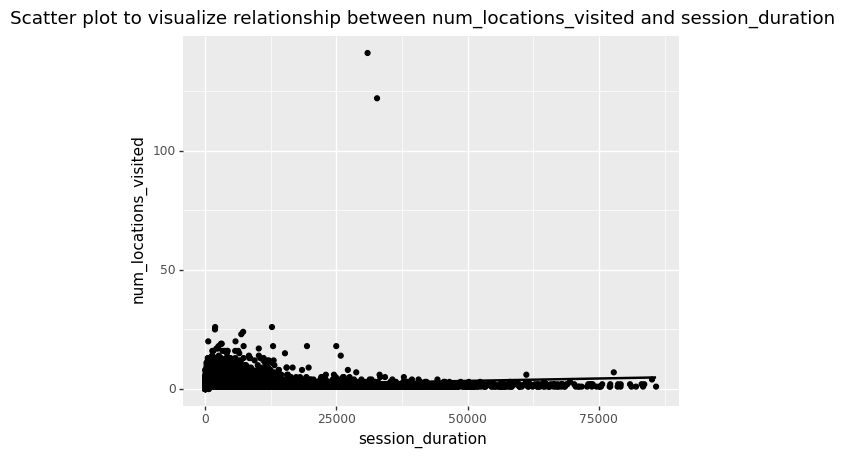

In [ ]:
plot_scatterplot(data=df_numeric_var, x_colname='session_duration', 
                 y_colname='num_locations_visited'
                 )


Given that scatterplot does not appear to show a clear linear relationship, Spearman correlation is used.
The implementation is provided below.

In [ ]:
corr_matrix = df_numeric_var.corr(method='spearman')

corr_matrix

,hour_of_day,session_duration,num_locations_visited,hits
hour_of_day,1.000000,0.006684,0.002628,0.021917
session_duration,0.006684,1.000000,0.394937,0.780672
num_locations_visited,0.002628,0.394937,1.000000,0.357741
hits,0.021917,0.780672,0.357741,1.000000


None of the predictors is strongly correlated which implies they will provide different signals for 
modeling. 

Spearman correlation analysis between the target variable and numberic predictors shows a moderate relationship 
for hits and number of locations visited and a strong association between hits and session duration.
A decision is made to select session_duration and num_locations_visited
for developing the modeling while the very weak association of hour_of_day with hits means that it is not selected to 
be included in the model.
The correlation result is visualize below.


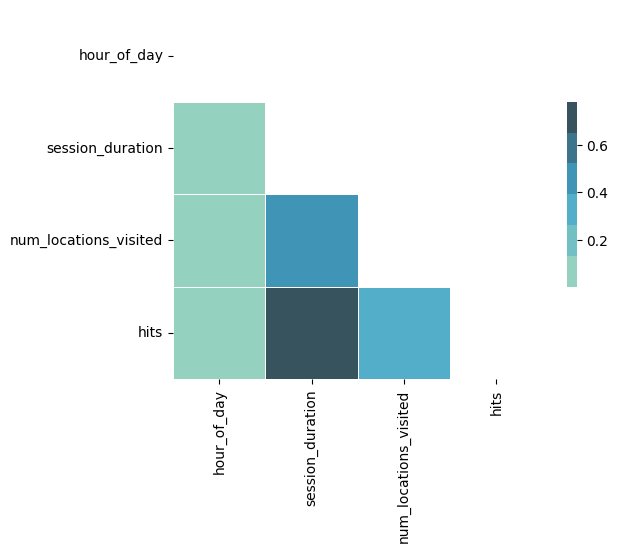

In [ ]:
# Create a mask to hide the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# visualize correlation matrix
sns.heatmap(corr_matrix, mask=mask, cmap=sns.color_palette("GnBu_d"), 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            )


plt.show()

####   Visualizing outliers

#### Boxplot to visualize outliers

Some algorithms are impacted by the presence of outliers hence analyzed to make an inform decision on which class of algorithm to choose from.

In [ ]:
# function to create boxplot
def make_boxplot(data: pd.DataFrame, variable_name: str):
    """This function accepts a data and variable name and returns a boxplot

    Args:
        data (pd.DataFrame): Data to visualize
        variable_name (str): variable to visualize with boxplot
    """
    fig = px.box(data_frame=data, y = variable_name,
                 template='plotly_dark', 
                 title = f'Boxplot to visualize outliers in {variable_name}'
                 )
    fig.show()

In [ ]:
# plot outliers
for var in numeric_var:
    make_boxplot(data=df_recat, variable_name=var)

Output hidden; open in https://colab.research.google.com to view.

From the boxplot of hits, it can be argue that outliers exist in the data. This is also the case for number of locations visited. Worthy to note is that, the outlier in hits also corresponds with the outlier in number of locations visited predictor.
This suggests that this is likely not a wrong measurement.  Rather, this could be the development of new trend that have not been adequately captured in the data yet hence appear to 
be an outlier in this sample. Generally, outliers can be imputed
with various methods such as mean or median imputation and regression methods.

This information informs the decision making process 
about which model to choose. From the visualization,
a decision is made in favour of choosing
a model that is fairly robust against outliers instead of removing
or imputing the outliers altogether.


###  Handling missing data


In [ ]:
# Total missing hits data as a percentage of all data points is estimated as follows
def get_missing_data_percent(data: pd.DataFrame, variable: str):
    total_missing = data[variable].isnull().sum()
    total_data = data.shape[0]
    percent_missing = (total_missing / total_data) * 100
    print(f'Percentage of data missing in {variable}: {round(percent_missing, 2)}%')


# implement function to get missing data percent
get_missing_data_percent(data=df, variable='hits')


Percentage of data missing in hits: 33.33%


As much as 33.33% which correspond to  193837 data points is missing for hits. 
The next important analysis is to determine how this missing data is distributed across
all locales. This is undertaken as follows:

In [ ]:
def count_missing_hits_per_locale(data: pd.DataFrame, loc_colname: str, hits_colname: str = 'hits'):
    # select only data where hits is missing
    df_missing_hits = data[data[hits_colname].isnull()]
    
    # group the data based on locale and count number of observations in each locale
    locale_missing_hits = df_missing_hits.groupby(by=loc_colname)[['index']].count()
    
    # rename columns to reflect the computation
    locale_missing_data_renamed = locale_missing_hits.reset_index().rename(columns={'index': 'num_missing_hits'})
    
    return locale_missing_data_renamed


missing_hits_per_locale = count_missing_hits_per_locale(data=df, loc_colname='locale', hits_colname='hits')
missing_hits_per_locale

,locale,num_missing_hits
0,L1,5882
1,L2,42228
2,L3,59721
3,L4,21041
4,L5,27705
5,L6,37260


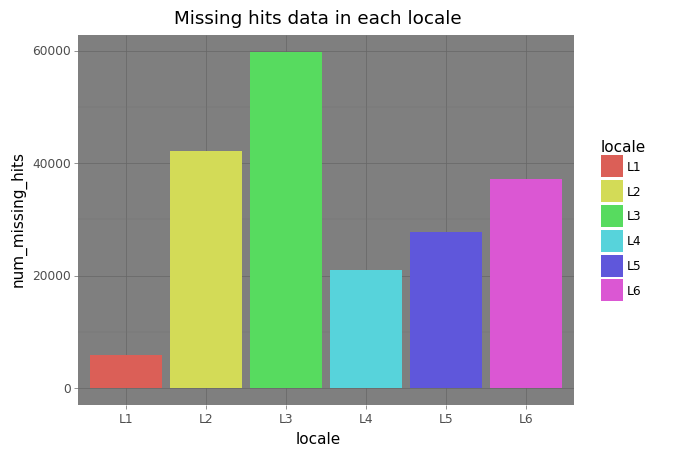

<ggplot: (8727616137975)>

In [ ]:
plot_bargraph(data=missing_hits_per_locale, x_colname='locale', 
              y_colname='num_missing_hits', fill_colname='locale',
              title='Missing hits data in each locale'
              )

Worth noting is the percentage of missing data that is precent in the various predictors. This is reported below.

In [ ]:
for var in df.columns:
    get_missing_data_percent(data=df, variable=var)

Percentage of data missing in index: 0.0%
Percentage of data missing in locale: 0.0%
Percentage of data missing in day_of_week: 0.15%
Percentage of data missing in hour_of_day: 0.0%
Percentage of data missing in agent_id: 0.0%
Percentage of data missing in entry_page: 0.0%
Percentage of data missing in path_id_set: 0.15%
Percentage of data missing in traffic_type: 0.0%
Percentage of data missing in session_duration: 0.15%
Percentage of data missing in hits: 33.33%
Percentage of data missing in data_loss_status: 0.0%


The percentage of missing data in predictors is relatively low (0.15%) and various imputation strategies 
such as mean or median, regression techniques such as KNN can be employed.

However, From the viewpoint of the target variable where about 33.3% of the data is missing, a number of 
paths are possible some of which may not be appropriate for this task. These are identified as 
follows:

1. Use semi-supervised method for the task
2. Impute the missing data
3. Use only labeled data points


From the identified approaches, it can be argue that imputation of target variable is not 
advisable given that this directly influence the learning process of the algorithm and such methods 
come with their margin of errors whereas we want to avoid errorneous labelling at all cost 
given that it will influence the training process in a way that does not reflect 
objective evaluation of the model. In any case, imputing as 
much as 33.3% means introducing a high amount of "artificial data" that can change the actual 
underlying distribution of the phenomenon being studied.


For this task and availaible time allotted, using only the labelled data based on the target variable 
is deem to be a more appropriate approach.



### Using insights gained from exploratory analysis to inform modelling approach

The findings of non-linear relationship between 
the predictors and target variable, presence of outliers,
and sizeable missing values suggest that a non-parametric
model that handles non-linear relationship,
outliers and missing values will be appropriate for the task.
 
Moreover, as identified in the objectives, the focus of the task is on a good precision rather than interpretability of the model and this informed a decision to choose an algorithm that satisfy these needs. 


On the basis of the findings from the exploratory analysis, a model 
that employs decision tree will be used. Before that, a critical aspect of the findings was that missing data is present and has to handled. 
For this, a model that natively handles missing data as part of the modelling process is explored. Hence, HistGradientBoostingRegressor from the sklearn library is implemented because it is a decison tree based model with an inbuilt handling of missing data for predictors.

It is duely recognized that semi-supervised learning could be used given that both labelled and unlabelled target variable exist. Nonetheless, supervised learning is used to demonstrate the modeling process and this means using only data points for which records are available for hits. Hence, missing data for hits is removed while 
missing data for predictors is handled natively by the algorithm.

Given that the target variable is continuous, supervised regression is used for the task. 

## Preprocessing data for machine learning
The preprocessing pipeline for predictors to be prepared for modeling is highlighted as follows

1. Multi-class categorical variables are encoded using One-hot encoding strategy 
2. Numercial variables are scaled using the standard scaler.

The preprocessing pipeline is implemented as follows: 

#### Encoding categorical variables to prepare them for modelling

While several encoding strategies exist to transform categorical variable into 
forms that machine learning models can understand, one hot encoding was used 
in this task. The preprocessing pipeline is implemented as follows:  


In [ ]:
# put all variables to be used in the modelling into a namespace for easier use
args = Namespace(
    target_variable = 'hits',
    selected_numeric_features = ['session_duration', 'num_locations_visited'],
    categorical_features = ['locale', 'day_of_week', 'traffic_type', 
                            'agent_id_new_cat', 'entry_page_new_cat'
                            ],
    predictors = ['locale', 'day_of_week', 'traffic_type', 'agent_id_new_cat', 
                  'entry_page_new_cat','session_duration', 
                  'num_locations_visited'
                  ]
    
)

### Create preprocessing pipeline

After segmenting the variables into different groups and identifying the required preprocessing techniques,
a preprocessing pipeline is created to process them. This is implemented as follows.

In [ ]:
one = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocess_pipeline =  ColumnTransformer([('scaler', 
                                           scaler, args.selected_numeric_features
                                           ),
                                          ('ohe',one, args.categorical_features)
                                          ], remainder='passthrough'
                                        )

### Splitting into Training and Testing dataset

Deciding on data splitting ratio for learning and evaluation is rather subjective. For this
task, 70% of the data is used for training and 30% for validation. Given that, there is relatively enough data,
70% dataset will likely provide enough data points to learn and derive as much insight from and 30% will still probably be enough 
to evaluate the model on data points capturing enough of the varying charateristerics that are unknown to the model. 

In order to gain an objective evaluation of the model, cross validation will be performed. This means that the training dataset,
will be further splitted during the training process into train and validation set while running the algorithm. Cross validation 
provide a more objective view on the true accuracy of the model.

Before splitting the data, steps are taken to ensure the outcome of all data points are known by removing missing data for hits given that 
supervised regression is the chosen method of modelling. 

In [ ]:
# the missing data in hits (target variable) is removed because 
# supervised classification is being performed
# hence all outcome are expected to be known

model_data = df_recat.dropna(subset='hits')
model_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 387652 entries, 0 to 387651
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  387652 non-null  int64  
 1   locale                 387652 non-null  object 
 2   day_of_week            387086 non-null  object 
 3   hour_of_day            387652 non-null  int64  
 4   agent_id               387652 non-null  int64  
 5   entry_page             387652 non-null  int64  
 6   path_id_set            387070 non-null  object 
 7   traffic_type           387652 non-null  int64  
 8   session_duration       387070 non-null  float64
 9   hits                   387652 non-null  float64
 10  data_loss_status       387652 non-null  object 
 11  agent_id_new_cat       387652 non-null  object 
 12  entry_page_new_cat     387652 non-null  object 
 13  num_locations_visited  387070 non-null  float64
dtypes: float64(3), int64(5), object(6)
m

It is worth noting that after removing data points for which the outcome is not known, missing data is still present in predictors.
Predictors such as day_of_week, session_duration, num_locations_visited  still have some missing values. This is reported below.

In [ ]:
# missing data in predictors after removing those of hits (target variable)
for var in model_data.columns:
    get_missing_data_percent(data=model_data, variable=var)


Percentage of data missing in index: 0.0%
Percentage of data missing in locale: 0.0%
Percentage of data missing in day_of_week: 0.15%
Percentage of data missing in hour_of_day: 0.0%
Percentage of data missing in agent_id: 0.0%
Percentage of data missing in entry_page: 0.0%
Percentage of data missing in path_id_set: 0.15%
Percentage of data missing in traffic_type: 0.0%
Percentage of data missing in session_duration: 0.15%
Percentage of data missing in hits: 0.0%
Percentage of data missing in data_loss_status: 0.0%
Percentage of data missing in agent_id_new_cat: 0.0%
Percentage of data missing in entry_page_new_cat: 0.0%
Percentage of data missing in num_locations_visited: 0.15%


#### Data splitting is implemented as follows;

In [ ]:
# create separate variable for target and predictors
y = model_data[args.target_variable]
X = model_data[args.predictors]

# split inot train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=2023
                                                    )


### Deciding on evaluation metric 

For this task the evaluation metric is predefined to be root mean square error (RMSE). This metric penalizes higher errors more 
in order to optimze the model for accuracy and more importantly the results are in the units of the target variable which is number 
of hits during a session in this case.

### Define baseline model

Modelling can be an iterative process in attempt to optimize and arrive at the best generalizable model. 

While achieving the best accuracy also means doing a lot of experimentation with different models and monitoring 
their results, this is not possible with the limited time and computational resource designated for this task. What is however, 
considered critical is that the model produced adds value to business. By this, a hypothetical situation is considered, 
whereby stakeholders such as product owners are currently making random guesses about hits prediction. In this case, 
the model to be developed need to perform better than those random guesses in general in order to be deemed as providing 
business value and worth the price and cost of developing it. This implies an element of comparison which can be achieved by defining
a baseline model that the model to be developed is compared to. It is worth noting that, any model to be developed 
need to perform better than the baseline model, only than can it be compared with other models that perform better
than the baseline base on accuracy.

But, how do we define the baseline model without ever fitting one?
A possible approach to that is to define the random guess prediction to be the mean of all hits in the training data. 
With this, the error of the baseline model is estimated to be the difference between the average prediction 
and actual prediction. Estimating the RMSE of that gives the accuracy of the baseline model which the model to be developed 
needs to do better than to considered for selection. This forms the intuition behind the baseline model and is implemented as follows.



In [ ]:
#%% mean hits in the training data
mean_hits = y_train.mean()
print(f"Average hits is {mean_hits: .3f}")



Average hits is  65.517


In [ ]:
# Baseline model RMSE 
baseline_pred = np.full(shape=len(y_test), fill_value=mean_hits)
baseline_rmse = mean_squared_error(y_true=y_test, y_pred=baseline_pred, squared=False)

print(f"Test data RMSE for baseline model: {baseline_rmse: .3f}")

Test data RMSE for baseline model:  80.276


The baseline model defined is assessed to have a RMSE of 80.276. Thus, the model to be developed should be 
capable of achieving a RMSE lower than that in order to be deem better and capable of adding business value.




### Developing model for Hit prediction -- HistGradientBoostingRegressor

After defining the baseline model performance, the model pipeline is created to be added to the preprocessing pipeline.
As indicated earlier, HistGradientBoostingRegressor is employed. The model pipeline is implemented below.



In [ ]:
#%% Histogram-based Gradient Boosting Regression Tree.
## chosen because it has an inbuilt handling on missing data

# random state set to achieve reproducible results  
histgb = HistGradientBoostingRegressor(random_state=2023)


### Implementing the preprocessing pipeline

The data to be passed to the model first goes through the preprocessing pipeline to be transformed before the agorithm is applied to it.
Worthy of note is that the preprocessing pipeline is only fitted on the training data but used to transform both training and testing data.
The pipeline is not fitted on the test data to prevent data leakage. This is implemented as follows.




In [ ]:
def apply_preprocess(predictor_data: pd.DataFrame, 
                     preprocess_pipeline: ColumnTransformer, 
                     preprocess_type: str = 'fit_transform'
                     ):
    preprocess_pipeline_obj = preprocess_pipeline
    if preprocess_type == 'fit_transform':
        sparse_obj = preprocess_pipeline_obj.fit_transform(predictor_data)
        X_train_dense = sparse_obj.todense()
        X_train_dense_array = np.asarray(X_train_dense)
        return X_train_dense_array
    elif preprocess_type == 'transform':
        sparse_obj = preprocess_pipeline_obj.transform(predictor_data)
        return np.asarray(sparse_obj.todense())

        

In [ ]:
# fit and transform train data
X_train_prep = apply_preprocess(predictor_data=X_train, 
                                preprocess_pipeline=preprocess_pipeline, 
                                preprocess_type='fit_transform'
                                )

# use the fitted preprocess to transform test data
X_test_prep = apply_preprocess(predictor_data=X_test, 
                               preprocess_pipeline=preprocess_pipeline, 
                               preprocess_type='transform'
                               )


### Creating cross validation of model

In fitting the model, cross validation approach with 20 folds is used which is a more objective assessment of the model given that it is 
fitted and evaluated on different training samples to gain a clearer understanding of how the model will perform on unseen data. 'neg_root_mean_squared_error' is used for scoring which is essentially the negative version of the define evaluation metric. The performance evaluation is the mean of the cross validation.

The actual selection of model is based of test dataset.
This is implemented below.

In [ ]:
histgb_cv = cross_validate(estimator=histgb,
                           X=X_train_prep, 
                            y=y_train,
                            cv=20, scoring='neg_root_mean_squared_error'
                        )
histgb_cv_mean = histgb_cv['test_score'].mean()

print(f'20 fold Cross validation Negative RMSE is {histgb_cv_mean}')

20 fold Cross validation Negative RMSE is -55.92544661904733


The cross validation result of 20 folds shows a negative RMSE of -55.925. This is only a cross validatation of the model and now the model has to be fitted 
and evaluated on the test set. The code is provided below.


In [ ]:
histgb.fit(X=X_train_prep, y=y_train)

train_rmse = mean_squared_error(y_true=y_train, y_pred=histgb.predict(X_train_prep), squared=False)

print(f'Model training error (RMSE) is: {train_rmse: .3f}')


Model training error (RMSE) is:  54.250


The various parameters used in fitting the model is shown below.

In [ ]:
histgb.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'quantile': None,
 'random_state': 2023,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Evaluation of Model on test set
The Root Mean Squared Error metric is used to evaluate the model as follows

In [ ]:
test_rmse = mean_squared_error(y_true=y_test, y_pred=histgb.predict(X_test_prep), squared=False)


print(f'Model test error (RMSE) is: {test_rmse: .3f}')



Model test error (RMSE) is:  58.662


The result shows a training RMSE of 54.250 and 58.662 for the test set. 
The model performs better than the baseline model hence capable of 
offering business value. As expected, the training set error is lower than the test set error which may suggest some overfitting.
Nonetheless, the difference between the training and test error is not much and is even close to the CV RMSE OF 55.925.
Thus, overfitting may not be too much of an issue but can be improved using techniques to be discuss here. In assessing the model, cross-validation evaluation is deem to be more representative of model's true performance and aids the hyperparameter optimization. Nonetheless, the test error is the main benchmark for evaluating the model to gain insight on how it performs on unseen data.

Hyperparameter optimization of the model will not only improve its precision and performance but also better business value hence demonstrated 
as follows.


#### Hyperparameter tuning with Random Grid Search

The model with default parameters is doing a better job than random guess (suggested by the baseline model) hence partly 
achieving the objective of the task. Nonetheless, the aim is to reduce error as much as possible to increase precision of prediction. 

It is duely recognized that a different algorithm may achieve a better performance and this indeed is often an explored option for achieving 
better precision of predictions. However, with limited time, it seems exploring options to improved the developed model is a better option.
Hence, techniques are explored to tune hyperparameters of the model developed to attain better performance.



Hyperparameter tuning can be undertaken using the grid search where a set of parameters is specified and a search is made using various combinations or permutation to test which combination best reduces error. 

Another approach is the Radomized grid search where a distribution is specified for numeric parameters and the algorithmn randomly select the values of the hyperparameters within the range or condition specified to optimize the model. The difference is that all possible combinations are used in grid search while random search randomly choose some of the combination a number of times equal to the value of n_iter argument specified. The model fitted with paramters randomly selected is evaluated on the validation set.

For this task, random grid search was demonstrated as a strategy of improving model performance. Given the time and computational constraints, limited search space was specified to tune HistGradientBoosting Regressor. Designing a good optimization parameter space to search from in that context needs a strategy. This can be guided by deductions made from the training of model.

The strategy here will be to design an optimal hyperparameter search space that concentrates on the lower sections or values of paramters with continuous value. By this, a higher number of iteration will also be set higher than that used by the trained model to enable a focus on the lower section of hyperparameter search space. This enables strategic approach to understanding how the hyperparameter search space can be explored to truely lower the RMSE. This informs setting a distribution from which hyperparameters are sampled from such that the lower end of max_iter is 350 and upper end is 360 which means any value selected will be higher than what was used in the default model training. Other hyperparameters have distributions such that the highest value is lower or equal to the default paramter used in training the model. For instance, the highest possible value that can be used during the hyperparameter tuning for 'max_leaf_nodes' is set to be 25 which is lower than that of the default. Also, 5 fold CV is used during the hyperparameter tuning and once the best estimator is identified from them, it is cross validated on 20 folds to gain a model evaluation that is more objective and comparable to the 20 fold CV done for the model with default parameters.

The discussion is implemented as follows.



In [ ]:
hyperparameter_space = {
                        'learning_rate': np.random.uniform(low=0.03, high=0.05, size=5),
                        'max_leaf_nodes': np.random.randint(low=20, high=25, size=5),
                        'min_samples_leaf': np.random.randint(low=25, high=30, size=5),
                        'l2_regularization': np.random.uniform(low=0.01, high=0.06, size=5),
                        'max_iter': np.random.randint(low=350, high=360, size=10)
            }

In [ ]:
random_search = RandomizedSearchCV(estimator=histgb, param_distributions=hyperparameter_space,
                                  n_iter=10,
                                  cv=5,
                                  refit=True,
                                  return_train_score=True, 
                                  n_jobs=-1,
                                  random_state=2023,
                                  scoring='neg_root_mean_squared_error',
                                  #verbose=4
                                  )

In [ ]:
random_search.fit(X=X_train_prep, y=y_train) 

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=2023),
                   n_jobs=-1,
                   param_distributions={'l2_regularization': array([0.04565197, 0.05560572, 0.0154139 , 0.03391014, 0.01282872]),
                                        'learning_rate': array([0.04776434, 0.04890165, 0.03036826, 0.0301417 , 0.03927513]),
                                        'max_iter': array([350, 352, 355, 357, 353, 357, 355, 350, 350, 358]),
                                        'max_leaf_nodes': array([24, 22, 20, 22, 24]),
                                        'min_samples_leaf': array([25, 25, 28, 29, 25])},
                   random_state=2023, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [ ]:
random_search.best_score_

-56.06696614280535

In [ ]:
random_search_20cv = cross_validate(estimator=random_search.best_estimator_, 
                                        X=X_train_prep, 
                                        y=y_train, cv=20, n_jobs=-1, 
                                        scoring='neg_root_mean_squared_error'
                                    )

random_search_20cv['test_score'].mean()

-55.89117269423453

In [ ]:
random_20cv_mean = random_search_20cv['test_score'].mean()

print(f'20 fold Cross validation Negative RMSE is {random_20cv_mean: .3f}')

20 fold Cross validation Negative RMSE is -55.891


The parameters for the best estimator identified is as follows:

In [ ]:
random_search.best_params_

{'min_samples_leaf': 29,
 'max_leaf_nodes': 24,
 'max_iter': 357,
 'learning_rate': 0.048901652245779914,
 'l2_regularization': 0.033910139457524635}

In [ ]:
# evaluation of tuned model on test set
mean_squared_error(y_test, random_search.predict(X_test_prep), squared=False)

58.68850101309432

The hyperparameter tuning was done as a quick search with a small hyperparameter search space that is explored more extensively with a high number of iterations for demonstration purpose only. A well designed parameter set will take a longer computational time to achieve good result. 

The key message is that hyperparameter tuning can lead to reducing error. For this, a very small improvement can be seen with 20 fold CV RMSE reduced to 55.891 compared to 55.925 of the model with default parameters.


That noted, the best estimator from the hyperparameter tuning exercise can be fitted on the training data and evaluated on the test data as follows. 

In [ ]:
improved_histboostgb = random_search.best_estimator_
hist_train_RMSE = mean_squared_error(y_train, improved_histboostgb.predict(X_train_prep), squared=False)


hist_test_RMSE = mean_squared_error(y_test, improved_histboostgb.predict(X_test_prep), squared=False)

print(f"The training RMSE for Best tuned HistGradientBoosting is: {hist_train_RMSE: .3f}")

print(f"The test RMSE for Best tuned HistGradientBoosting is: {hist_test_RMSE: .3f}")


The training RMSE for Best tuned HistGradientBoosting is:  55.032
The test RMSE for Best tuned HistGradientBoosting is:  58.689


The evaluation of the tuned model shows test RMSE which is 58.610 compared to 58.662 for the model with default parameters. Moreover, it can be argued that the tuned model slightly reduces overfitting. This is deduced from the tuned model having a lower difference between the training RMSE (55.032) and test RMSE (58.689) when compared to the default model with lower difference between training RMSE(55.925) and test RMSE(58.66).

Overfitting is an important element that needs to be tackled in modelling and bagging is demonstrated as technique for that in this task.

### Bagging as an approach to improving model performance and overfitting

Bootstrap Aggregating (bagging) as a technique is used to reduce overfitting and error further.
Bagging involves multiple random sampling with replacement and for each sample fits HistGradientBoostingRegressor to produce scores which are aggregated. As expected, this helps reduce overfitting as more samples are fitted on by model hence more stable to unseen data. The prediction from a bagging regressor is often the average of all predictions from all estimators used on various samples of the data.

Bagging is implemented for the HistGradientBoostingRegressor as follows







In [ ]:
# Use best parameters from tuned model for bagging 
bagging = BaggingRegressor(estimator=HistGradientBoostingRegressor(random_state=2023,
                                                        l2_regularization=0.033910139457524635, #0.05064128343656924, 
                                                        learning_rate=0.048901652245779914, #0.043329641007064504, 
                                                        max_iter=357,#356,
                                                        min_samples_leaf=29,#27,
                                                        max_leaf_nodes=24,#23
                                                        ),
                           n_estimators=10, n_jobs=-1,
                           random_state=2023
                           )

In [ ]:
# fit the model 
bagging.fit(X=X_train_prep, y=y_train)

BaggingRegressor(estimator=HistGradientBoostingRegressor(l2_regularization=0.033910139457524635,
                                                         learning_rate=0.048901652245779914,
                                                         max_iter=357,
                                                         max_leaf_nodes=24,
                                                         min_samples_leaf=29,
                                                         random_state=2023),
                 n_jobs=-1, random_state=2023)

In [ ]:
#%% RMSE to evaluate bagged histgradientboosting
bagg_hist_train_rmse = mean_squared_error(y_train, 
                                          bagging.predict(X_train_prep),
                                          squared=False
                                          )

bagg_hist_test_rmse = mean_squared_error(y_test, 
                                         bagging.predict(X_test_prep), 
                                         squared=False
                                        )

print(f"Bagged HistGradientBoosting training dataset RMSE: {bagg_hist_train_rmse: .3f}")

print(f"Bagged HistGradientBoosting testing dataset RMSE: {bagg_hist_test_rmse: .3f}")






Bagged HistGradientBoosting training dataset RMSE:  55.111
Bagged HistGradientBoosting testing dataset RMSE:  58.592


In [ ]:
bagging_cv20 = cross_validate(estimator=bagging,
                              X=X_train_prep, 
                              y=y_train,
                              cv=20, scoring='neg_root_mean_squared_error',
                              n_jobs=-1
                            )

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
bagging_cv20['test_score'].mean()

-55.96375846610535

The result for bagging of HistGradientBoosting is evaluated to have reduce test RMSE to 58.593 as compared to  test RMSE of 58.662 for model with default parameter and 58.689 test RMSE for tuned model.


In terms of comparing RMSE of 20 fold cross validation, the bagged model performed a little worst with 55.964 compared to 55.911 of the tuned model and 55.925 of the model with default parameters. 



### Potential measures to improve the model

Modelling can be a very iterative exercise with time and resource such as computational power constraints and this is duly recognized here. It is therefore concluded that, there is a good 
chance the model developed here can be further improved with those available resources using appropriate measures. Instead of aiming to exhaust all implementation to produce the lowest RMSE possible for a model; some of the measures to improve the model are highlighted here as further course of action.

1. Use alternative machine learning algorithms: First, it is duly recognized that a different machine learning algorithm and even deep learn algorithm has a good chance of producing a better precision.
For instance, the target variable can actually be seen as a count occuring within a particular time (session) hence poisson regression is natural course to explore to verify its performance. 



2. Feature selection and engineering: While some feature engineering has been undertaken, more feature engineering is likely to produce more impactful predictors. Feature selection remains a critical process of improving the model. For instance, the hour of day feature was not used in building the model due to earlier insight from filter-based feature selection that it had very low association with hits. It will be interesting to include it in the model to verify if it improve the model without overfitting. Hour of the day could also be subjected to a good feature engineering for the model. 

While only normalization or scaling 
is less likely to significantly improve performance of decision tree based models explored here, the technique should be explore for other type of models. 

Closely related is the option of augmenting the data with new variables. Potential variables and data to use or collect include content score which measures the quality of the content on the page.
This variable could be a quantitative or ordinal one with values ranging from 0 to 100. Generally, it is expected that a page with 
high quality content is likely to trigger higher page interaction and vice-versa. The number of images that are on each page or location is likely to be a contributor to the number of hits made as a user scrolls through various pages or locations. The page type is also a variable to consider given that pages that have more call to actions or require user interaction are likely to result in hits than pages with only reading content hence a determinant of hits.


2. Experiment with different techniques of handling missing data to discover which approach reliably produce a stable and optimized model. This approach could be iterative but a very interesting domain to put resource to establish domain relevant method of handling missing data since it appears to be a challenge for the data.

3. Tuning hyperparameters: The models developed can be further improved by experimenting with hyperparameters to select combinations that reduce error to the bare minimum. A larger hyperparameter search space will enable choosing better hyperparameters that improve the model's precision.


a)What other metrics can your model predict that can be useful?

The model is developed to specifically predict a single metric being number of hits per session. Thus, to predict a different metric, a different variable from the data has to be identified as representative of the metric and used as a target variable. Deducing from the available data, the following metric can be predicted from the data.


1. Page view (locations) per session which is the number of pages or locations visited during a session. This metric can be useful in tracking or measuring site or product engagement level. A method for extracting such a variable from the data has already been demonstrated where path_id_set variable is transformed into number of locations visited. This variable can be used as the outcome and other variables used as predictors for such a modelling task.




b)What other columns would you like to have to improve your model?

Most of the variables provided capture internal trends and characteristics of the trivago page. However, given that trivago's activities are related to travel and holidays which is influence by many exogenuous factors, it is important to account for the influence of those factors on the business and hits prediction in this context. These exogenuous predictors will capture different kinds of signals not accounted for in the modeling exercise and are identified as follows;

(i) Holidays variable which indicates whether or not a day is a holiday is likely to be a predictive feature of hits. This guess is based on the educated assumption that holidays offer users the freedom of space and time to be online and engage more with trivago page which will possibly lead to higher hit compared
to non holidays.

(ii) Number of days before a holiday or major celebration: There is likely to be a relationship between
the number of days before a holiday as users are likely to use the platform more often before a certain number of days prior to a holiday to make bookings and in the process make more hits on the page. How a "count down to a holiday" influences page hits and the threshold beyond which page hits significanty 
increases is not  known for certain but can be researched and included in the model for predicting hits.

(iii) Content score will also be an important predictor as discussed above

(iv) Number of images on a page is also an important variable as more images may result in less mouse clicks on the page but may make the page more interesting and frequently visited. 







c)Can your model predict the hits for tomorrow?

No, the model does not currently account for temporal dimension. 

Predicting the hits for tomorrow would be better than by having the dataset aggregating on the scale of daily hits hence the date and possible time need to be included in the dataset as a feature. In such cases, time series forecasting may be employed for predicting hits. Trends and seasonality will also have to consider in forecasting hits. The day of week feature while providing a clue as to when a hit occured, it does not provided accurate date and time ordering or chronological insight. Even though we know Thursday comes after Wedneday, there are several Thursdays and Wednesdays in the dataset hence it is not possible to identify which comes before the other as an insight for predicting tomorrow. 











## Making prediction on test data
To make predictions, the bagged HistGradienBoostingRegressor model is used. As already indicated, hits are counts and poisson regression could be an alternative model to explore. In order to make sure the predictions made which are float values reflect hits, the predictions were round-off to nearest whole number. It should be noted that, this action in itself could introduce some margin of error.







### Preparing predictions for submission 

For your predictions, a .csv file containing two columns: index and hits for all the rows where hit data is not available.


To make predictions for submission, missing data for hits is selected and model used to make predictions for them.

In [ ]:
# select data points where hits is missing
submission_data = df_recat[df_recat.hits.isnull()]

In [ ]:
submission_df = submission_data[args.predictors].copy()

In [ ]:
# use preprocess pipeline applied on training data 
# to transform submission prediction data

submission_prep = apply_preprocess(predictor_data=submission_df, 
                                  preprocess_pipeline=preprocess_pipeline, 
                                  preprocess_type='transform'
                                  )

In [ ]:
# use model to make prediction

sub_prediction = bagging.predict(X=submission_prep)

In [ ]:
submission_df = submission_df.reset_index()[['index']].copy()
submission_df['hits'] = sub_prediction.clip(min=0).round()
submission_df

,index,hits
0,387652,29.0
1,387653,72.0
2,387654,32.0
3,387655,25.0
4,387656,31.0
...,...,...
193832,581484,16.0
193833,581485,163.0
193834,581486,104.0
193835,581487,195.0


In [ ]:
submission_df.to_csv('submission.csv')

**Notice of miscellaneous outside model that could influence prediction accuracy**

In order to get prediction that reconceal with reality of positive count including zero as present in the dataset, model predictions 
less than 0 where clip to 0 in addition to rounding decimals to whole numbers. A number of different approaches are noted, one of which will be to add the RMSE to those negative values to obtain 
positive prediction. This among other strategies were not experimented here. Moreover, the technique used here to transform predictions into tangible ranges have not been assessed as part of the model evaluation. This is a critic. Under normal circumstance with adequate time for task, this transformation of values should be done as part of the model evaluation to gain a clear view of how they influence the evaluation metric.  
